---
title: " ✏️ W07 Formative"
author: "44800"
format: html
self-contained: true
jupyter: python3
engine: jupyter
editor:
  render-on-save: true
  preview: true
---

## ⚙️ Set up

In [504]:
import pandas as pd
import re
import missingno as msno
import sweetviz as sv
import statsmodels.api as sm
from lets_plot import *
LetsPlot.setup_html()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, fbeta_score, precision_score, recall_score, precision_recall_curve, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import numpy as np
import miceforest as mf
from lets_plot.plot import gggrid
from pytablewriter import MarkdownTableWriter

## Question 1  
### 1.1 Load the data

In [505]:
df = pd.read_csv('corruption_dataset.csv')

In [506]:
df.head()

,Country,"Inflation, consumer prices (annual %)",Urbanization (%),FDI (% of GDP),"GDP per capita, PPP (current international $)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Tax revenue (% of GDP),Individuals using the Internet (% of population),Trade Openness (% of GDP),Rule of Law Score,...,RSF_PressFreedomIndex_PoliticalScore,RSF_PressFreedomIndex_EconomicScore,RSF_PressFreedomIndex_LegalScore,RSF_PressFreedomIndex_SocialScore,RSF_PressFreedomIndex_SafetyScore,ECI,CPI score 2022,LiteracyRate_TotalPopulation_Pct,Gini_Index,Domestic credit to private sector (% of GDP)
0,Afghanistan,NaN,26.616,NaN,2122.995815,14.100,NaN,NaN,72.885470,-1.659846,...,"44,65","43,88","42,54","43,33","16,96",-1.199298,24,37.3,31.00,NaN
1,Albania,6.725203,63.799,7.579342,19429.921317,10.137,NaN,82.6137,84.698064,-0.165585,...,"50,55","29,39","68,77","66,6","66,75",-0.258308,36,99.0,29.42,33.791246
2,Angola,21.355290,68.081,-6.320564,7924.888806,14.602,NaN,39.2935,69.691071,-1.022036,...,"52,83","35,03","61,11",73,"63,87",-0.468852,33,72.0,51.27,8.628867
3,Argentina,NaN,92.347,2.402155,29597.693843,6.805,11.122869,88.3754,31.547708,-0.482352,...,"76,36","51,53","90,68","85,75","82,06",-0.300466,38,99.0,37.80,NaN
4,Armenia,8.640911,63.573,4.999916,19161.370051,13.379,21.827155,77.0277,101.410778,-0.169516,...,"66,26","44,44","77,88","76,33","79,91",0.183791,46,99.8,27.94,52.553843


In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 29 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country                                                              102 non-null    object 
 1   Inflation, consumer prices (annual %)                                97 non-null     float64
 2   Urbanization (%)                                                     102 non-null    float64
 3   FDI (% of GDP)                                                       98 non-null     float64
 4   GDP per capita, PPP (current international $)                        102 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)  101 non-null    float64
 6   Tax revenue (% of GDP)                                               70 non-null     float64
 7   Individu

### 1.2 Data cleaning

In [508]:
df.columns

Index(['Country', 'Inflation, consumer prices (annual %)', 'Urbanization (%)',
       'FDI (% of GDP)', 'GDP per capita, PPP (current international $)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Tax revenue (% of GDP)',
       'Individuals using the Internet (% of population)',
       'Trade Openness (% of GDP)', 'Rule of Law Score',
       'Government Effectiveness', 'Regulatory Quality',
       'Real GDP Growth (% Change)', 'Voice and Accountability: Estimate',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Central government debt, total (% of GDP)',
       'External debt stocks (% of GNI)',
       'Public and publicly guaranteed debt service (% of exports)',
       'RSF_PressFreedomIndex', 'RSF_PressFreedomIndex_PoliticalScore',
       'RSF_PressFreedomIndex_EconomicScore',
       'RSF_PressFreedomIndex_LegalScore', 'RSF_PressFreedomIndex_SocialScore',
       'RSF_PressFreedomIndex_SafetyScore', 'ECI', 'C

In [509]:
df.columns = (
    df.columns.str.lower()  # Convert to lowercase
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove brackets and everything inside them
    .str.replace(r"[ ,:/-]+", "_", regex=True)  # Replace spaces, commas, colons, slashes, and hyphens with underscores
    .str.strip("_")  # Remove leading/trailing underscores
)

df.columns

Index(['country', 'inflation_consumer_prices', 'urbanization', 'fdi',
       'gdp_per_capita_ppp', 'unemployment_total', 'tax_revenue',
       'individuals_using_the_internet', 'trade_openness', 'rule_of_law_score',
       'government_effectiveness', 'regulatory_quality', 'real_gdp_growth',
       'voice_and_accountability_estimate',
       'political_stability_and_absence_of_violence_terrorism_estimate',
       'central_government_debt_total', 'external_debt_stocks',
       'public_and_publicly_guaranteed_debt_service', 'rsf_pressfreedomindex',
       'rsf_pressfreedomindex_politicalscore',
       'rsf_pressfreedomindex_economicscore',
       'rsf_pressfreedomindex_legalscore', 'rsf_pressfreedomindex_socialscore',
       'rsf_pressfreedomindex_safetyscore', 'eci', 'cpi_score_2022',
       'literacyrate_totalpopulation_pct', 'gini_index',
       'domestic_credit_to_private_sector'],
      dtype='object')

In [510]:
df = df.rename(columns={'cpi_score_2022': 'cpi'})

Upon inspecting the dataset, we see that for the variables that we obtained from RSF, i.e. ```"rsf_pressfreedomindex"```, ```"rsf_pressfreedomindex_politicalscore"```, ```"rsf_pressfreedomindex_economicscore"```, ```"rsf_pressfreedomindex_legalscore"```, ```"rsf_pressfreedomindex_socialscore"```, ```"rsf_pressfreedomindex_safetyscore"```, all the values have commas instead of decimal points. We will replace these commas with decimal points and convert the columns to float.

In [511]:
cols_to_fix = ['rsf_pressfreedomindex', 'rsf_pressfreedomindex_politicalscore', 'rsf_pressfreedomindex_economicscore', 
               'rsf_pressfreedomindex_legalscore', 'rsf_pressfreedomindex_socialscore', 'rsf_pressfreedomindex_safetyscore']

# replace commas and convert to float
df[cols_to_fix] = df[cols_to_fix].apply(lambda x: x.str.replace(",", ".").astype(float))

In [512]:
df[cols_to_fix].head()

,rsf_pressfreedomindex,rsf_pressfreedomindex_politicalscore,rsf_pressfreedomindex_economicscore,rsf_pressfreedomindex_legalscore,rsf_pressfreedomindex_socialscore,rsf_pressfreedomindex_safetyscore
0,38.27,44.65,43.88,42.54,43.33,16.96
1,56.41,50.55,29.39,68.77,66.60,66.75
2,57.17,52.83,35.03,61.11,73.00,63.87
3,77.28,76.36,51.53,90.68,85.75,82.06
4,68.97,66.26,44.44,77.88,76.33,79.91


### 1.3 Missingness patterns in the data  
First, we will check for missing values in the dataset.

In [513]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 29 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
central_government_debt_total,67,65.7
public_and_publicly_guaranteed_debt_service,38,37.3
external_debt_stocks,37,36.3
tax_revenue,32,31.4
domestic_credit_to_private_sector,16,15.7
trade_openness,7,6.9
inflation_consumer_prices,5,4.9
individuals_using_the_internet,5,4.9
fdi,4,3.9
unemployment_total,1,1.0


Then, we will explore the missingness patterns in the data. We will use the ```missingno``` library to visualize the missingness patterns in the data.

<Axes: >

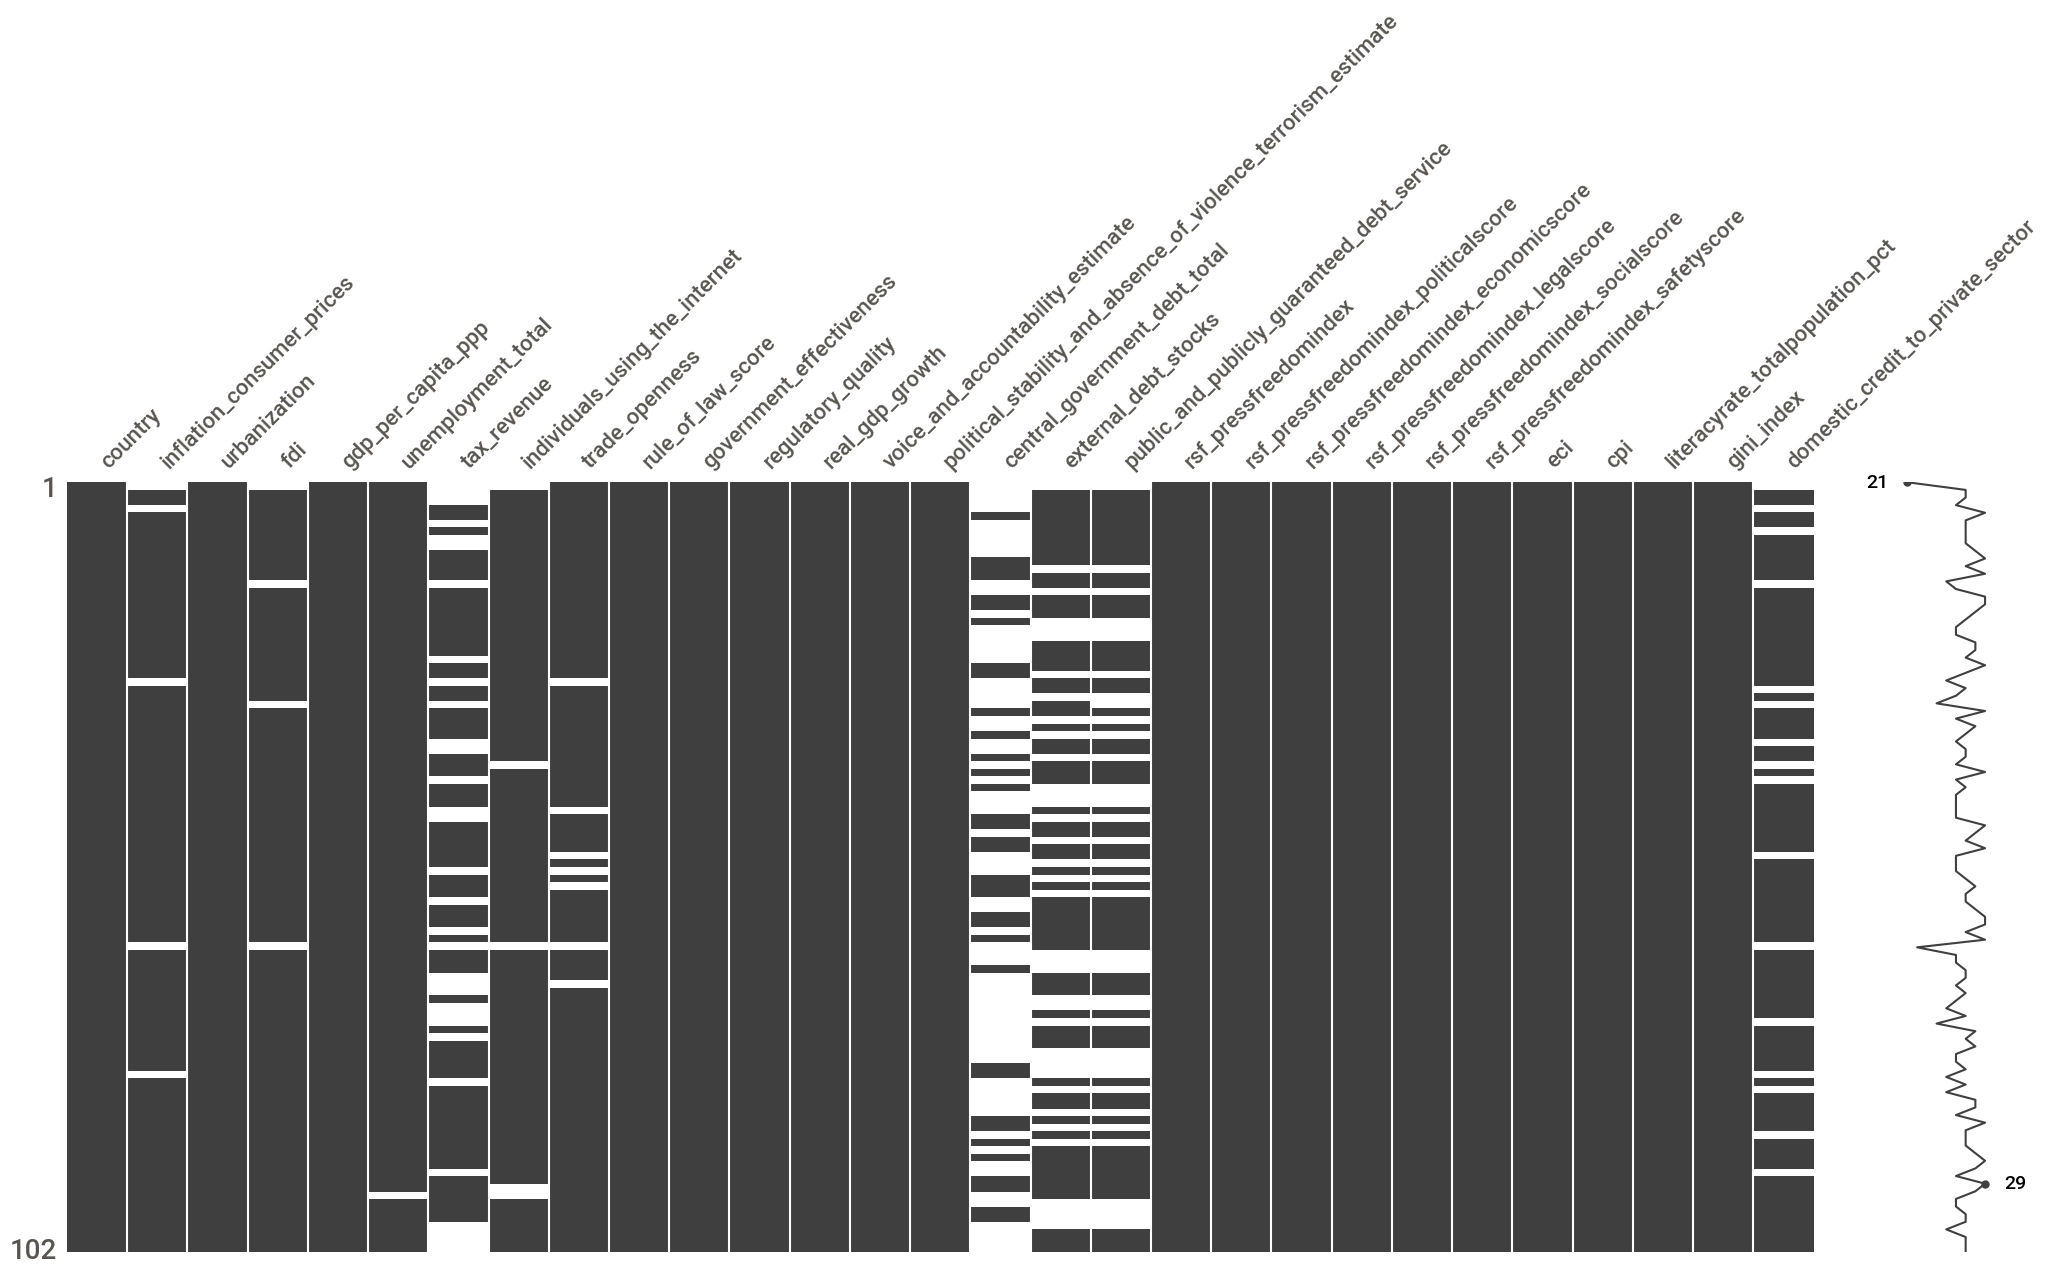

In [514]:
msno.matrix(df)

<Axes: >

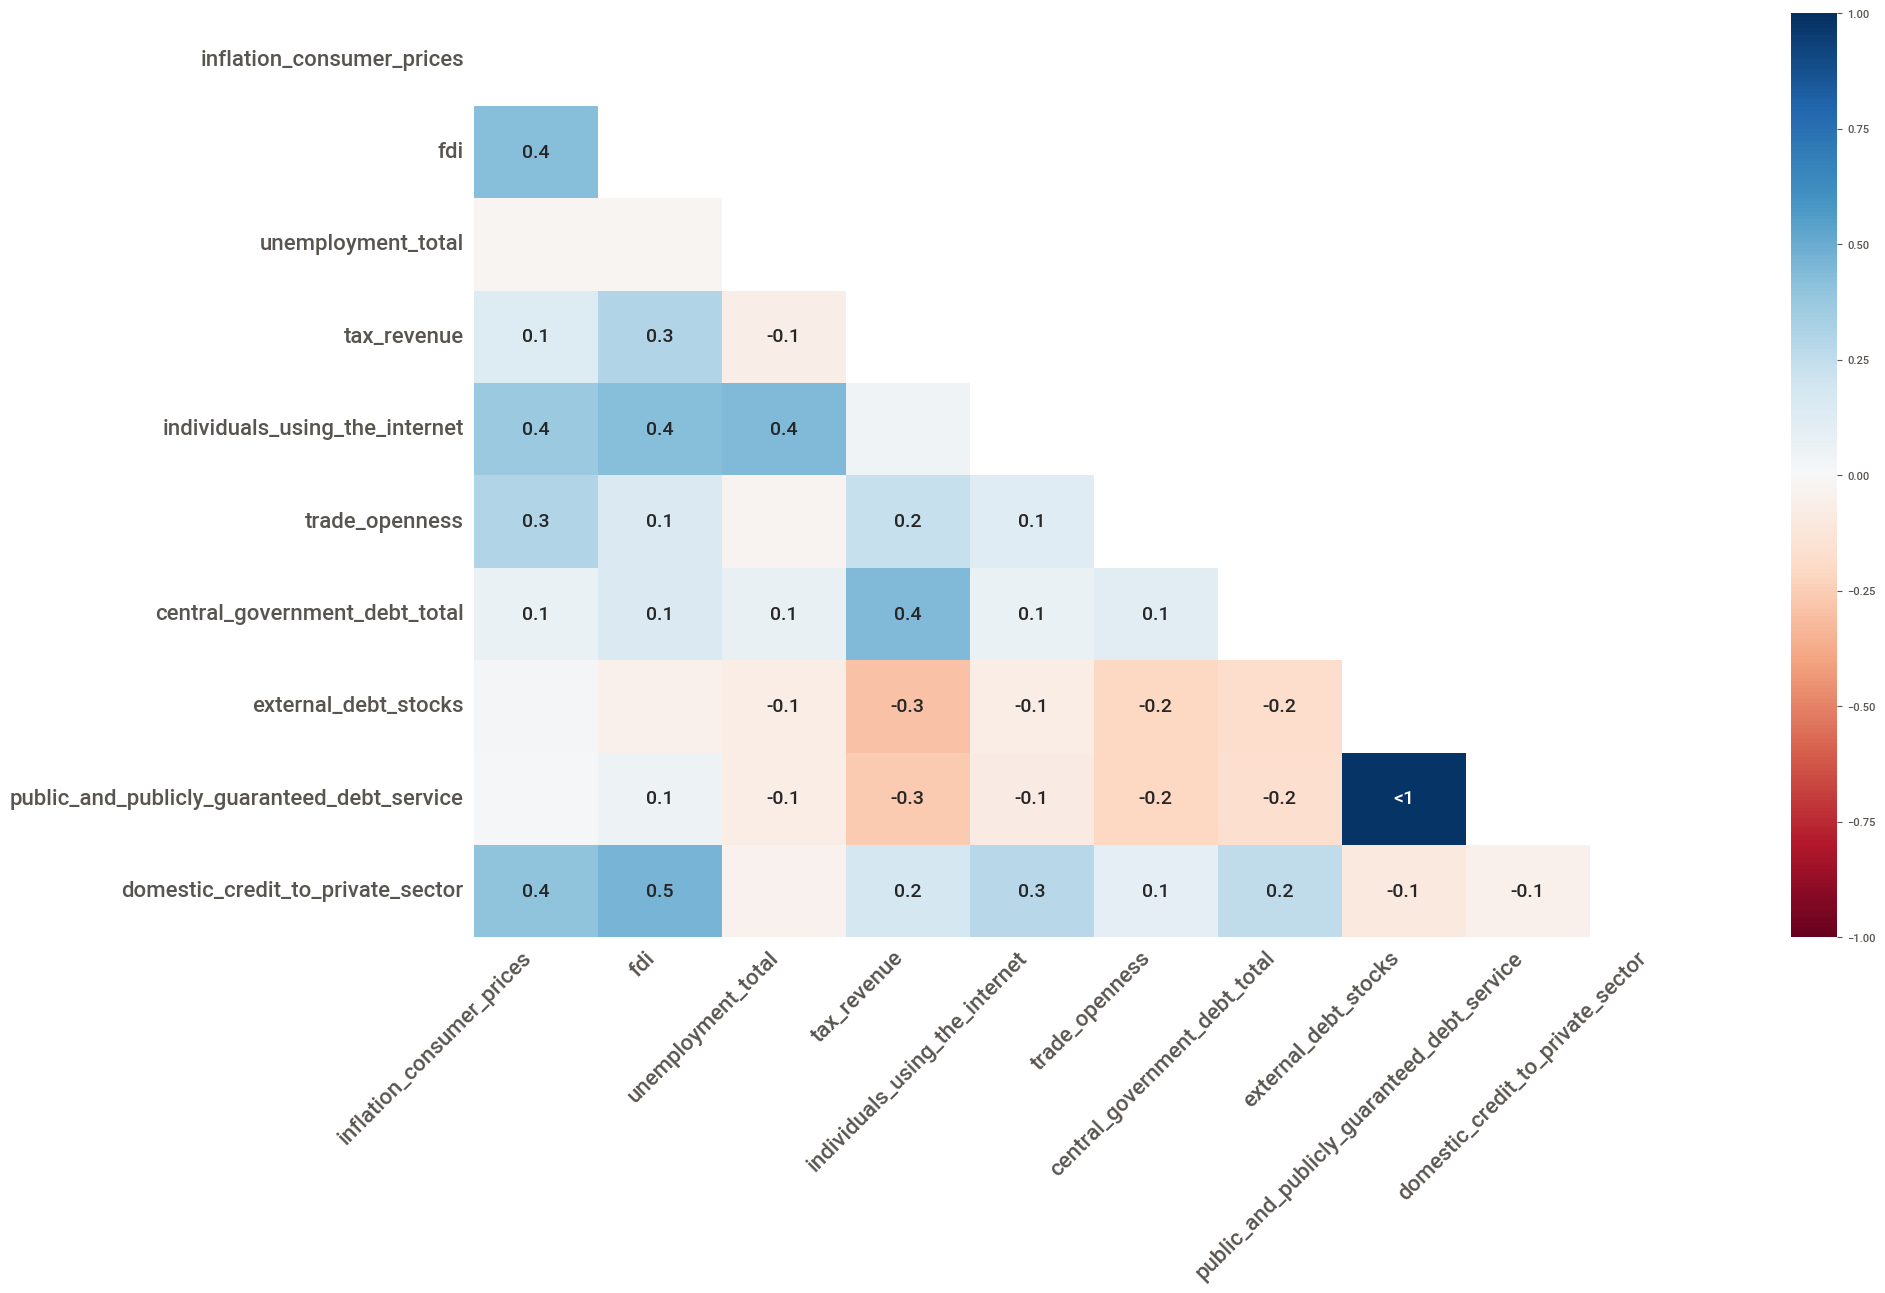

In [515]:
msno.heatmap(df)

Both the table and the missingness matrix tell us that ```"central_government_debt_total"``` has a significant amount of missing values (65.7%).  

As for missingness patterns, we will look at the missingness matrix and the heatmap: 
- Visually inspecting the missingness matrix, ```"public_and_publicly_guaranteed_debt_service"``` and ```"external_debt_stocks"``` have almost an identical missingness pattern. The heatmap confirms this as the correlation between the missingness of these two variables is close to 1. These variables are certainly not missing completely at random (MCAR).  
- In fact, debt related variables (```"central_government_debt_total"```, ```"public_and_publicly_guaranteed_debt_service"```, ```"external_debt_stocks"```) have a lot of missing values in the dataset. These may be missing not at random (MNAR) if we believe that governments of highly indebted countries might deliberately withold or misreport this information. However, a quick check of the source data from the World Bank [^1] shows that this unlikely the case, and is simply due to the fact that data was not collected for certain countries (so missing at random (MAR)). 
    - For example, there was no data collected from the North American countries for ```"public_and_publicly_guaranteed_debt_service"``` and ```"external_debt_stocks"```.   
    - As for ```"central_government_debt"```, what stands out is that almost all of the countries in Africa have missing data. This may be because African countries lack centralised debt reporting systems or are not included in the data source due to institutional or data collection limitations.
- Several macroeconomic indicators (```"inflation_consumer_prices"```, ```"fdi"```, ```"unemployment_total"```, ```"trade_openness"```) have missing values in the dataset. These are likely MAR too- missing due to data collection errors rather than deliberate withholding.  

[^1]: ```"central_government_debt"```: https://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS   
```"public_and_publicly_guaranteed_debt_service"```: https://data.worldbank.org/indicator/DT.TDS.DECT.EX.ZS   
```"external_debt_stocks"```: https://data.worldbank.org/indicator/DT.DOD.DECT.GN.ZS

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)                          



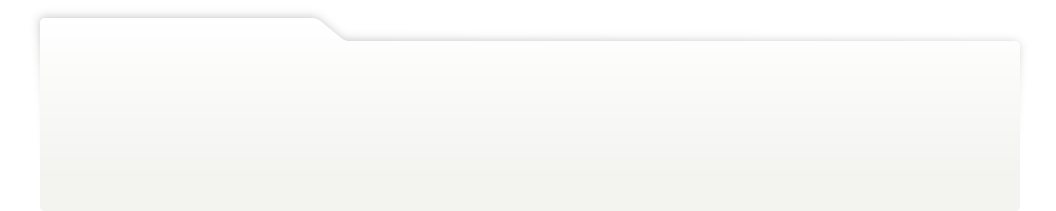
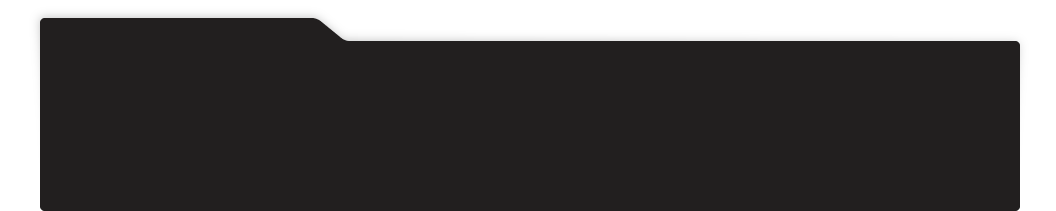
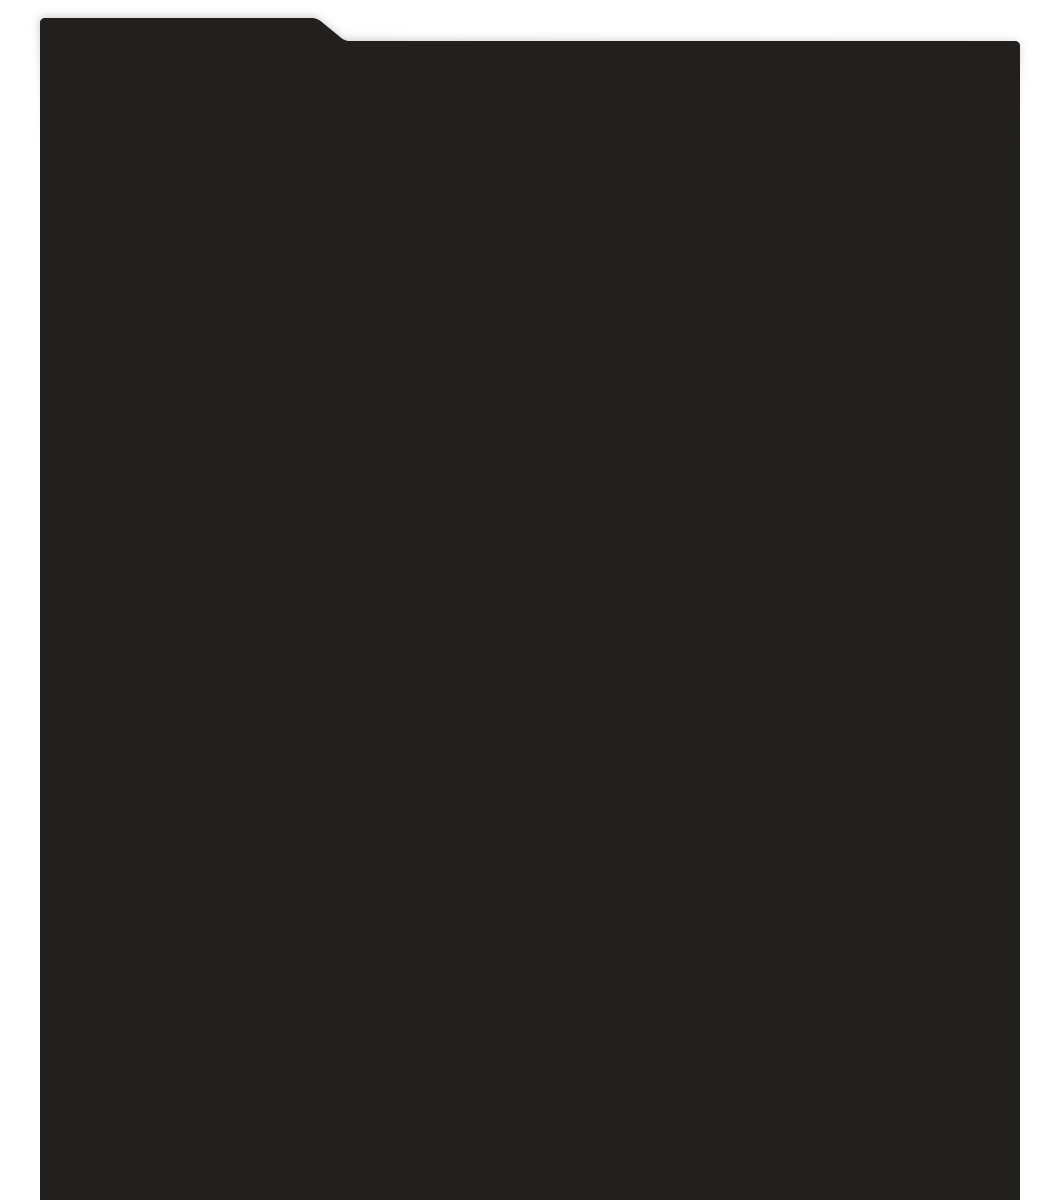
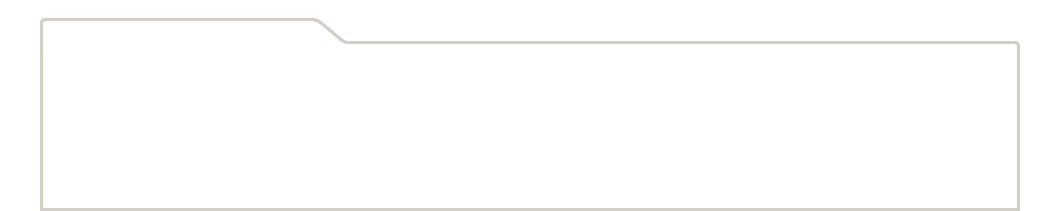
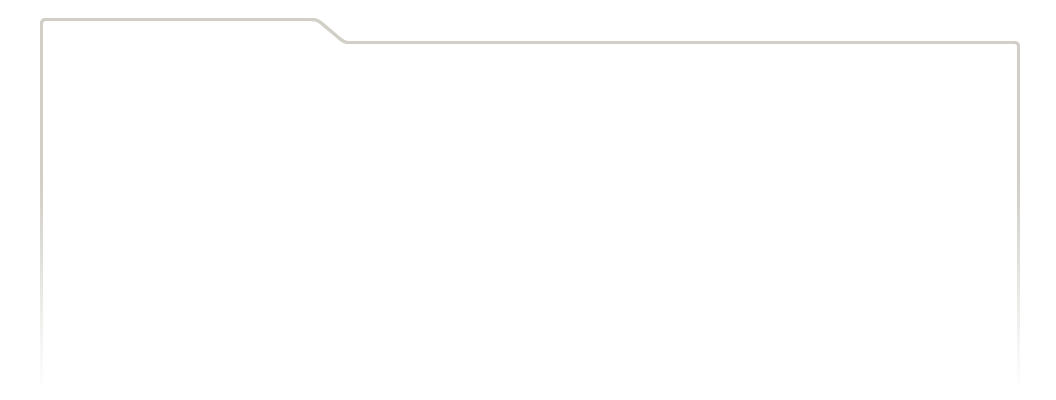
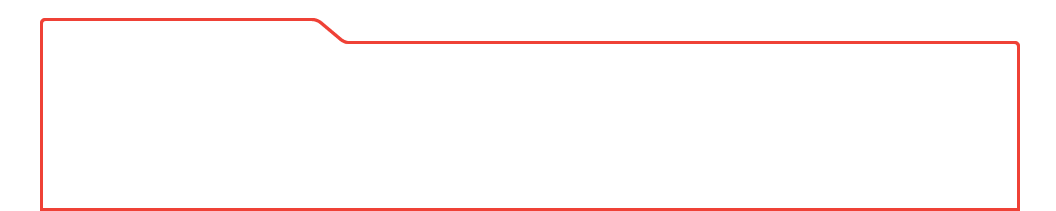
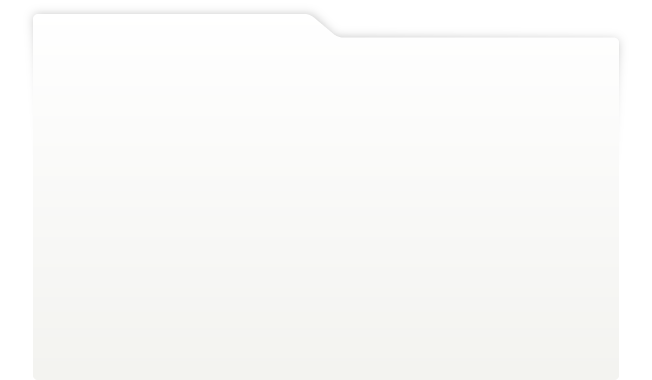
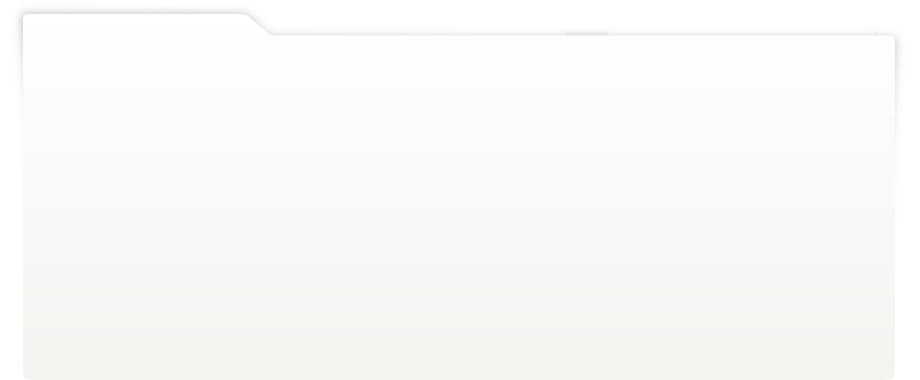
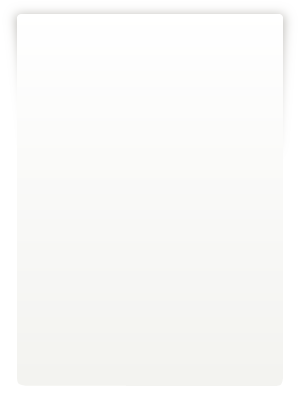
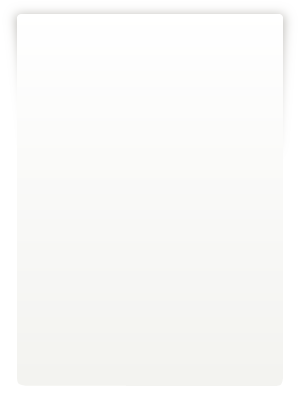
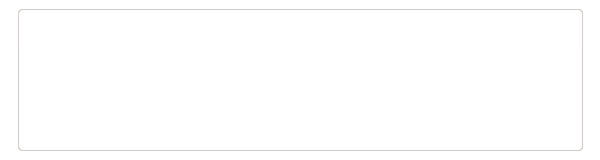
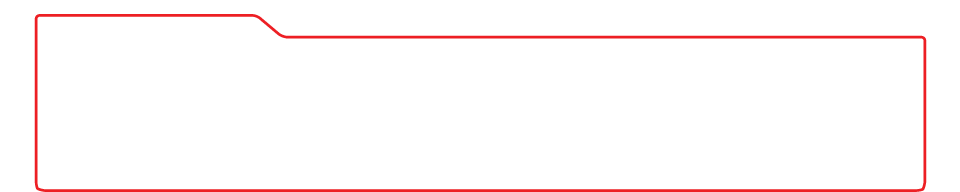
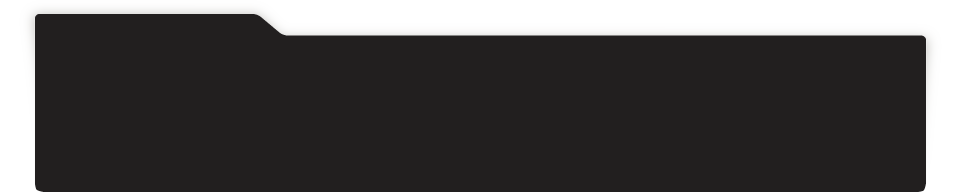
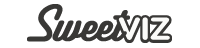
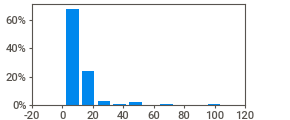
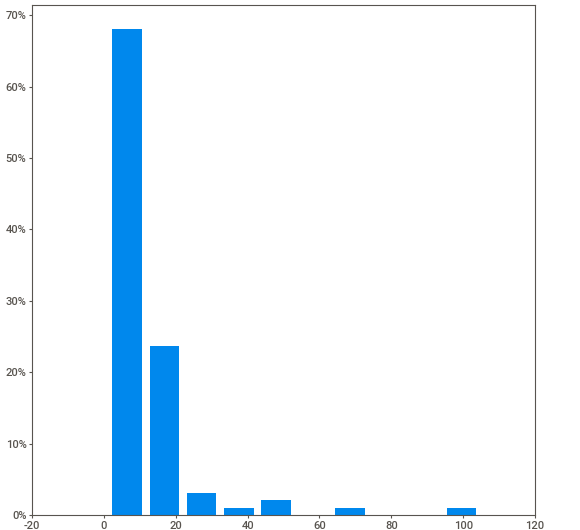
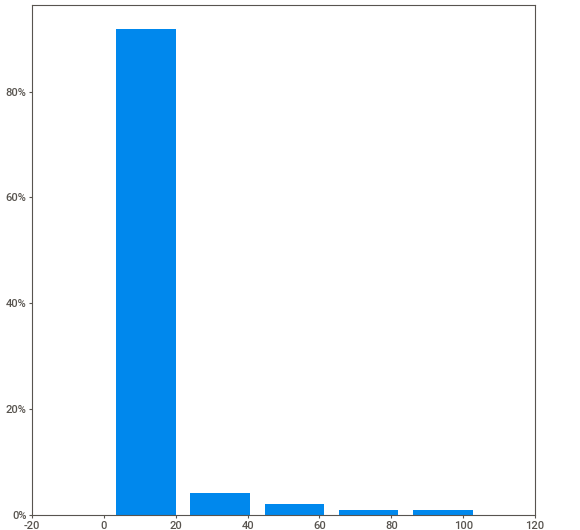
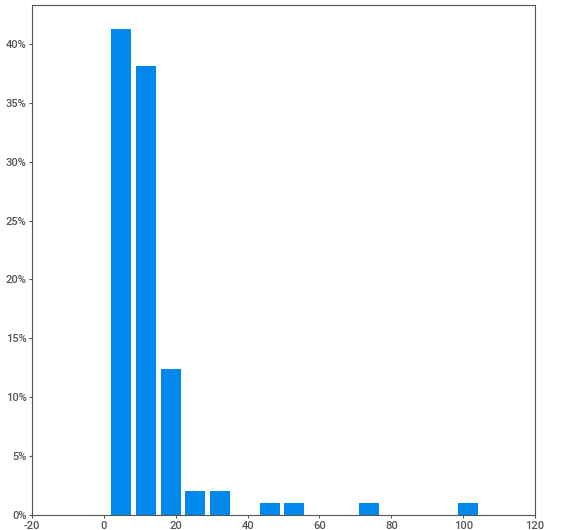
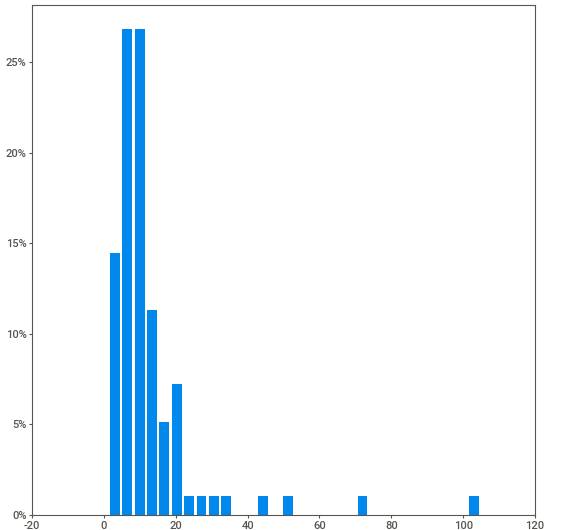
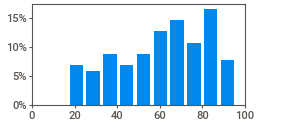
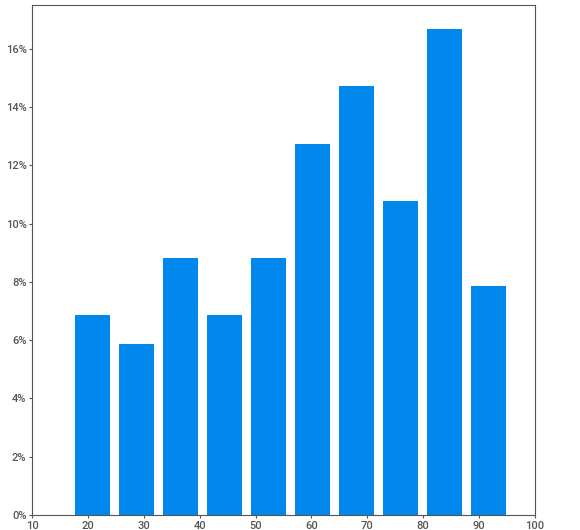
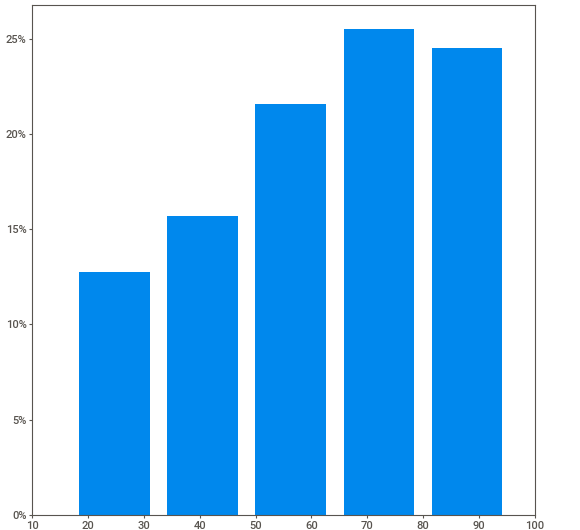
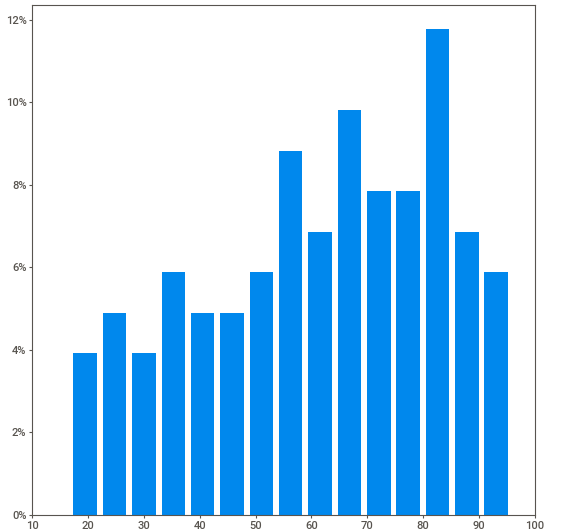
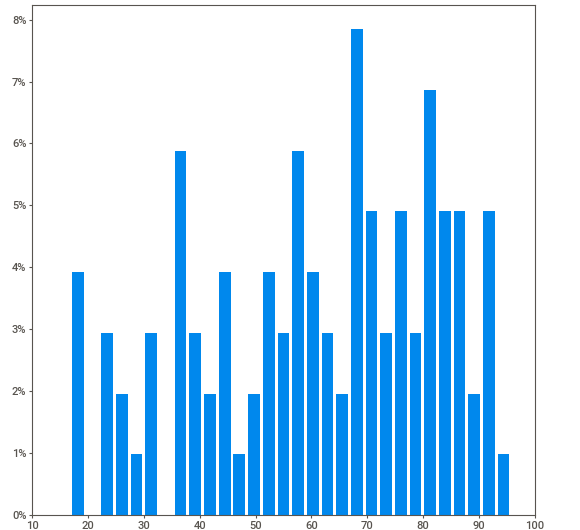
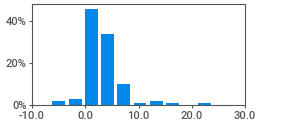
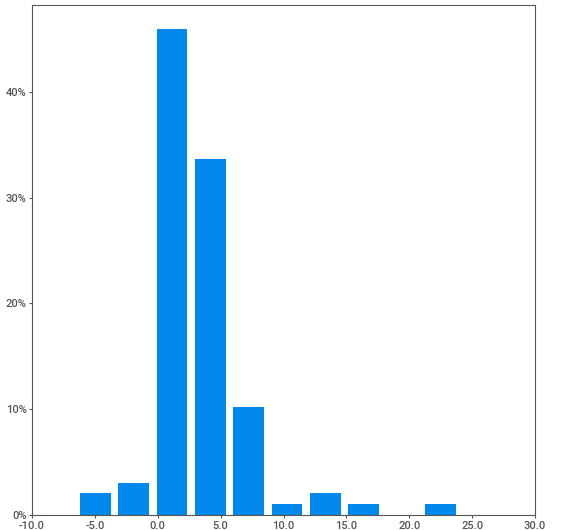
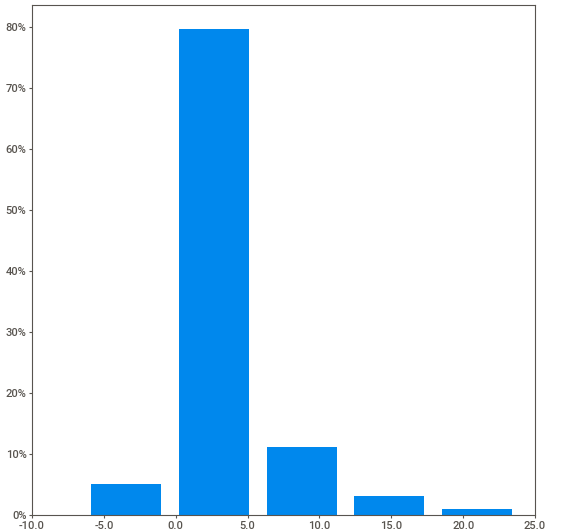
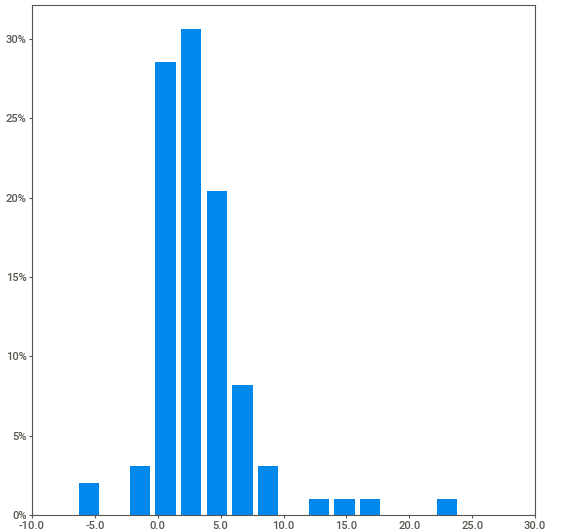
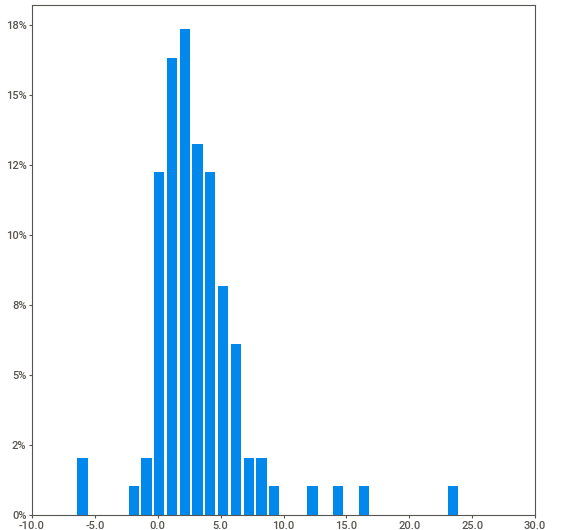
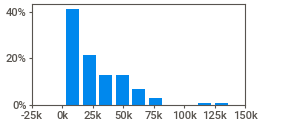
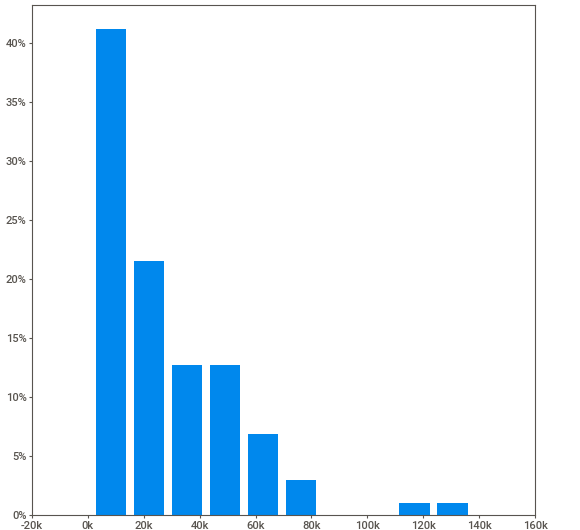
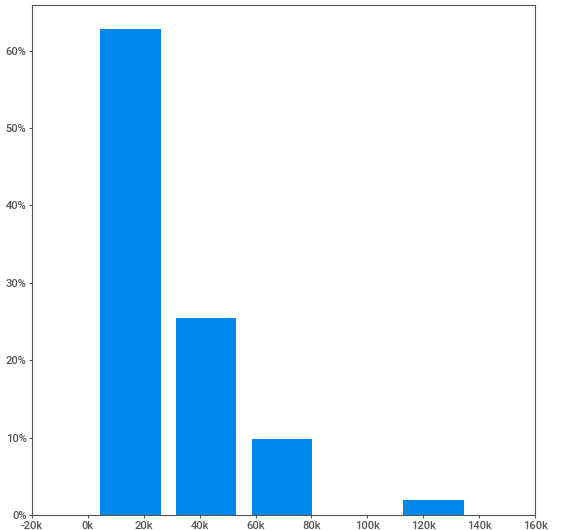
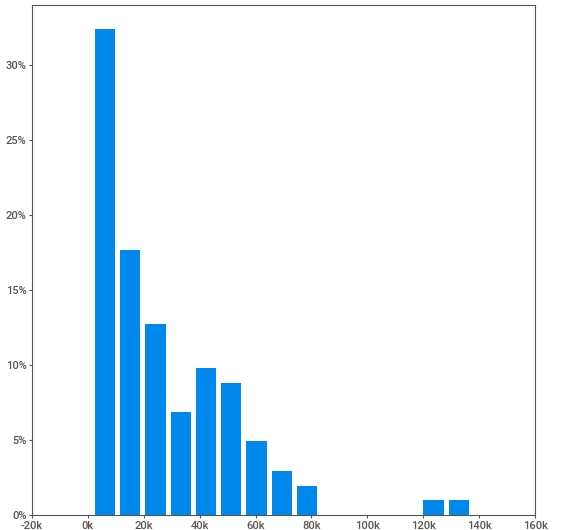
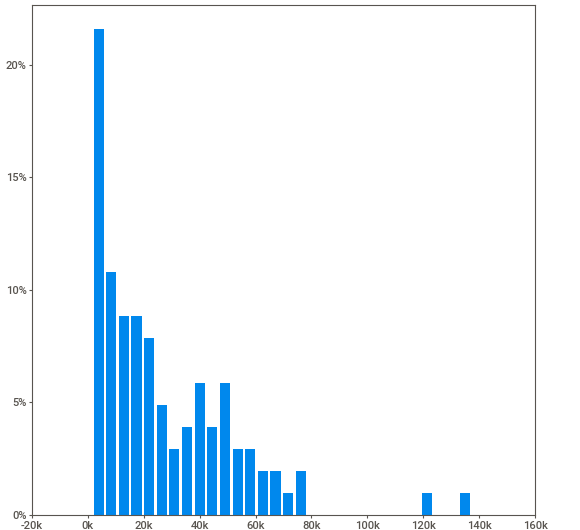
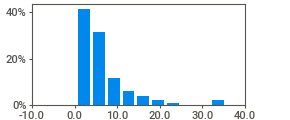
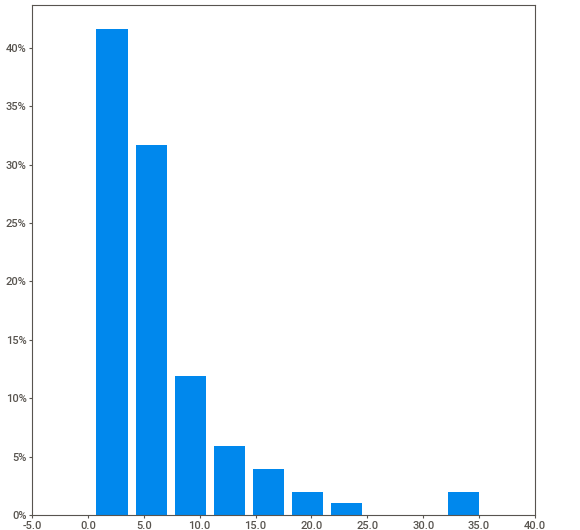
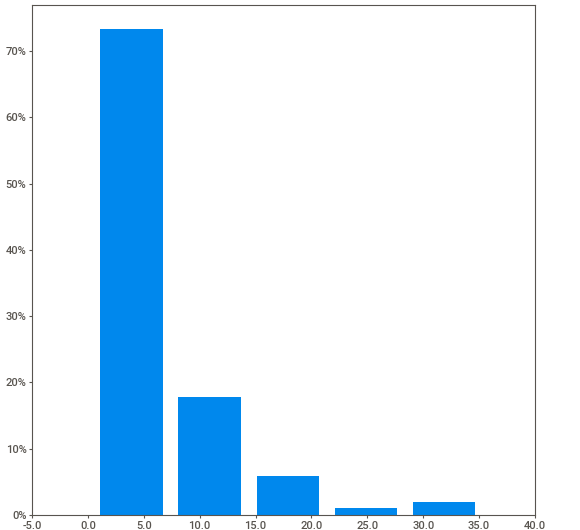
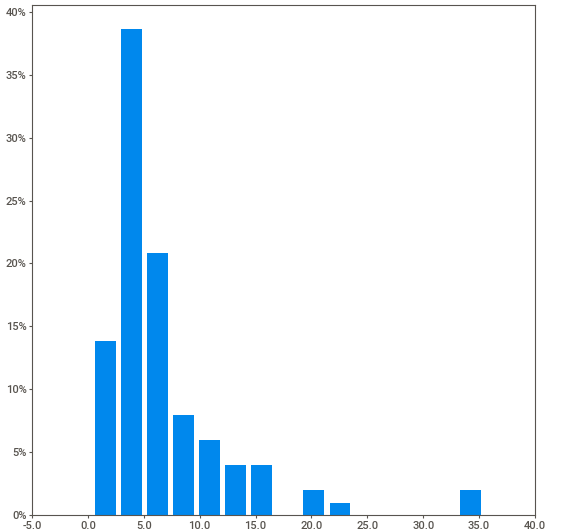
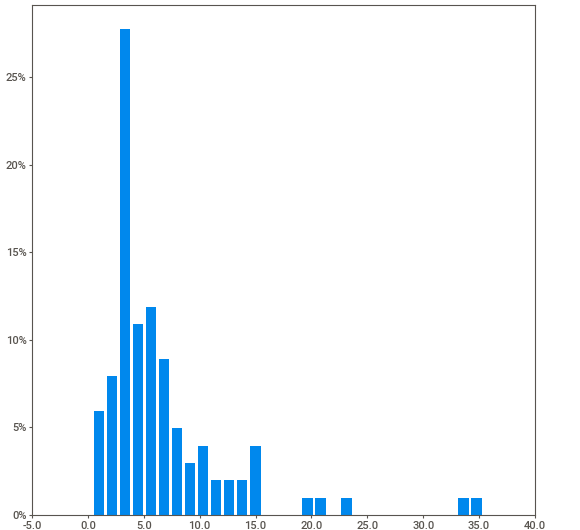
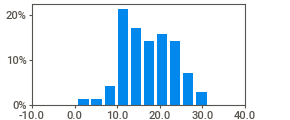
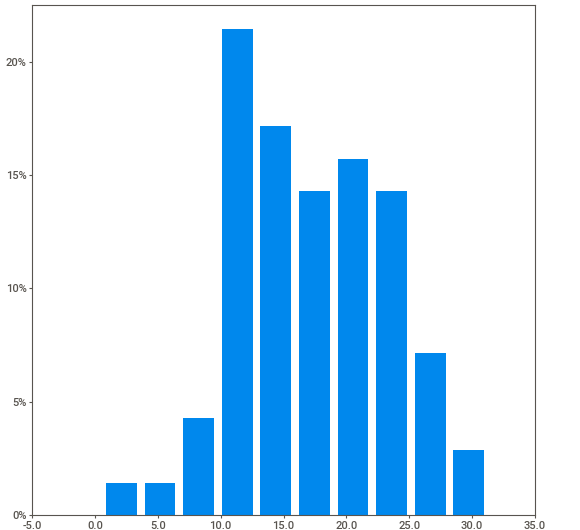
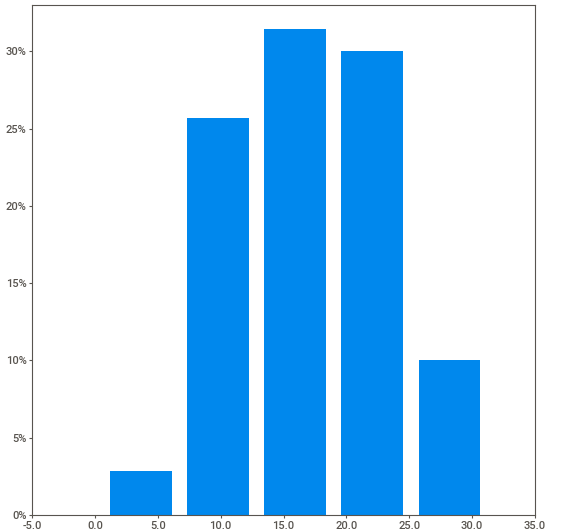
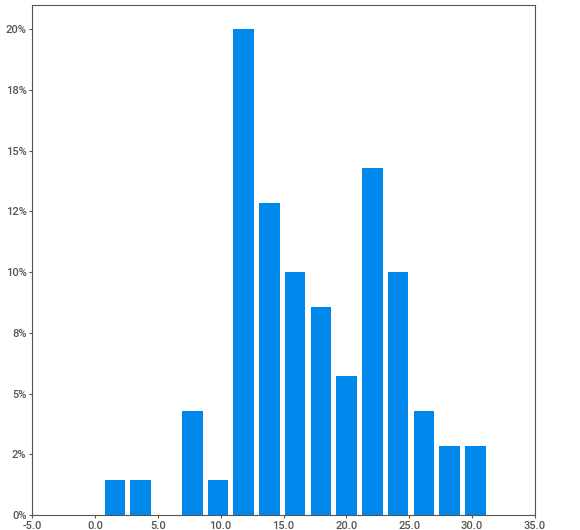
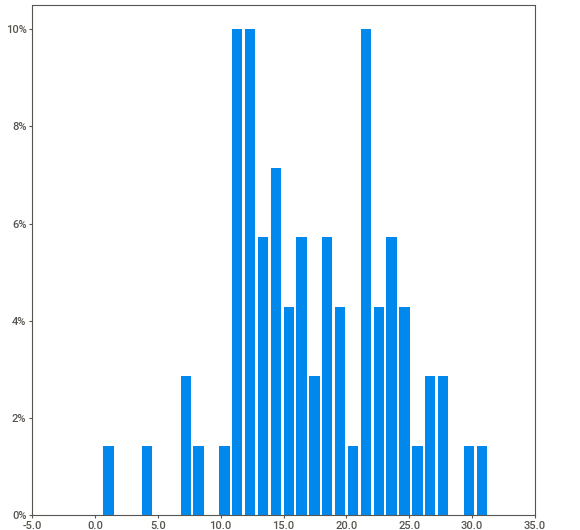
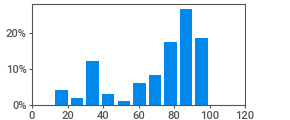
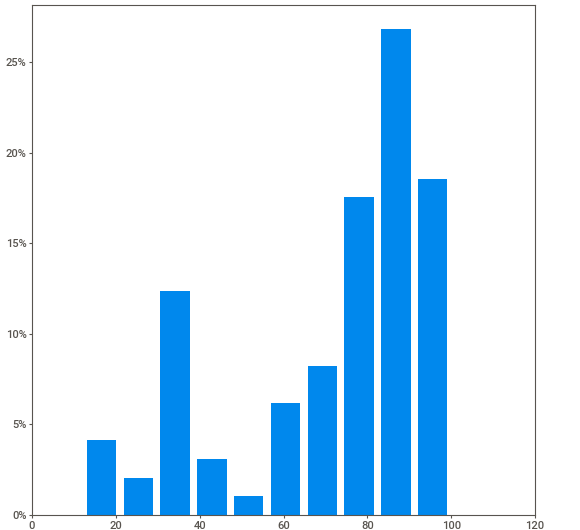
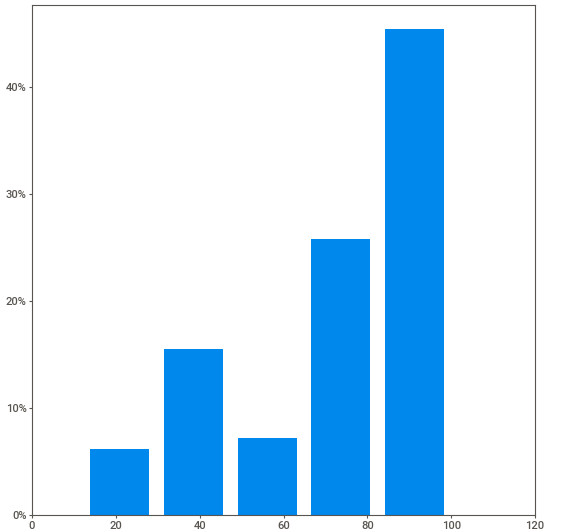
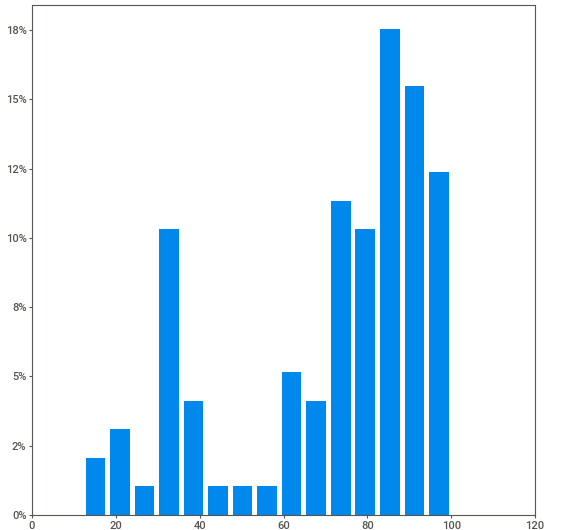
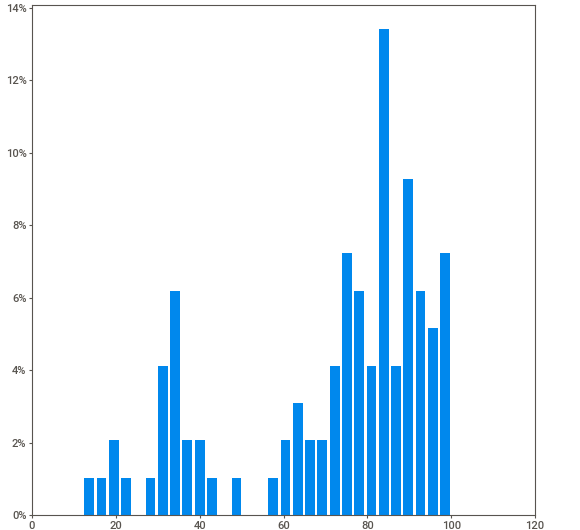
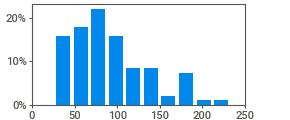
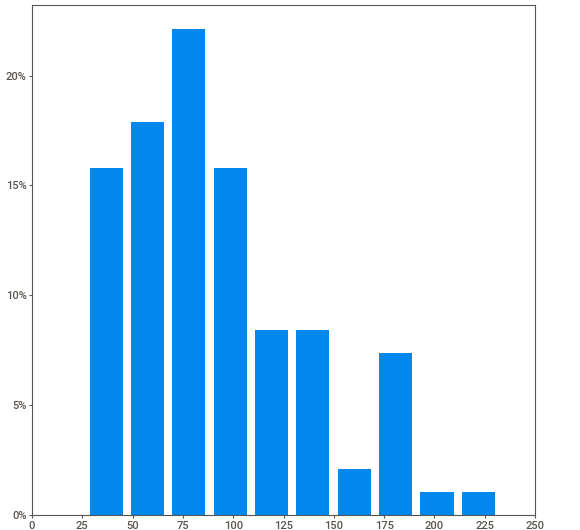
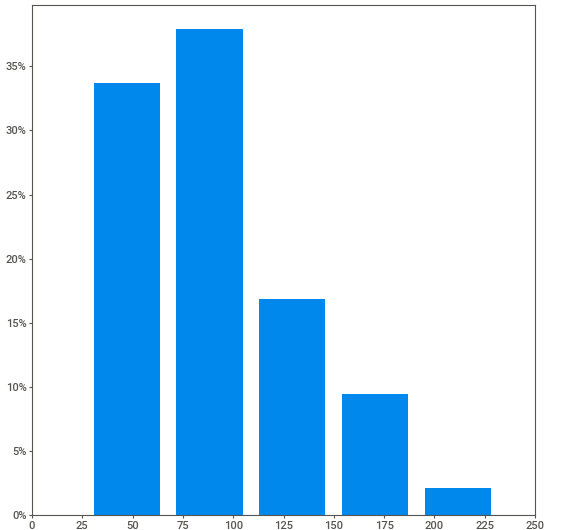
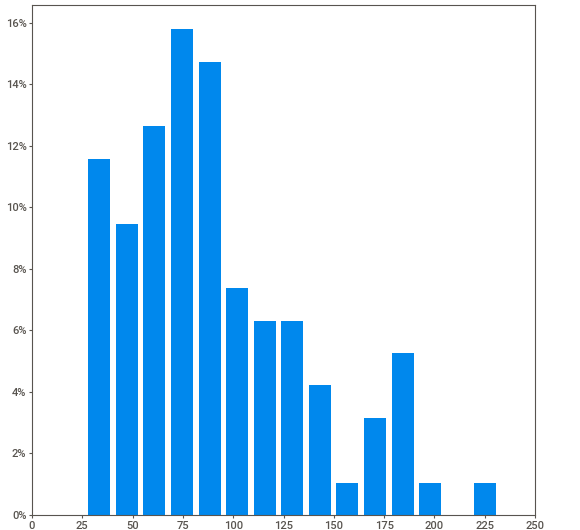
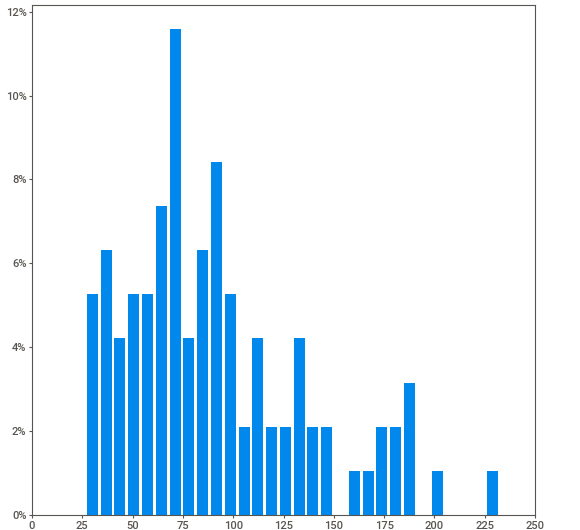
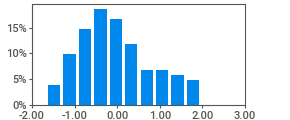
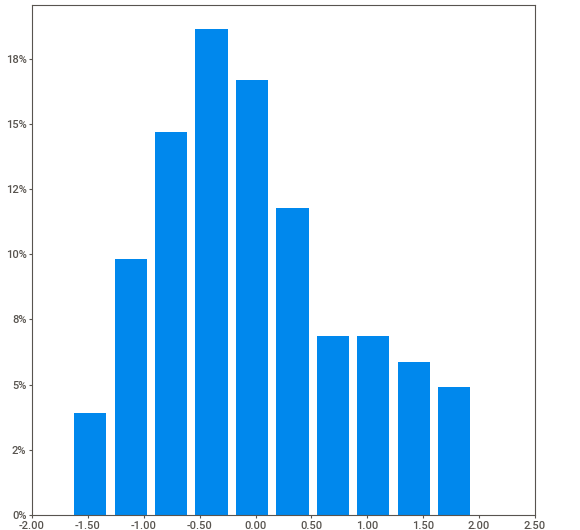
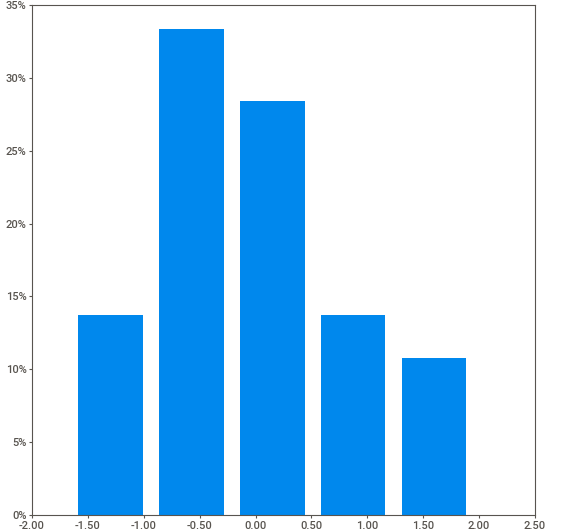
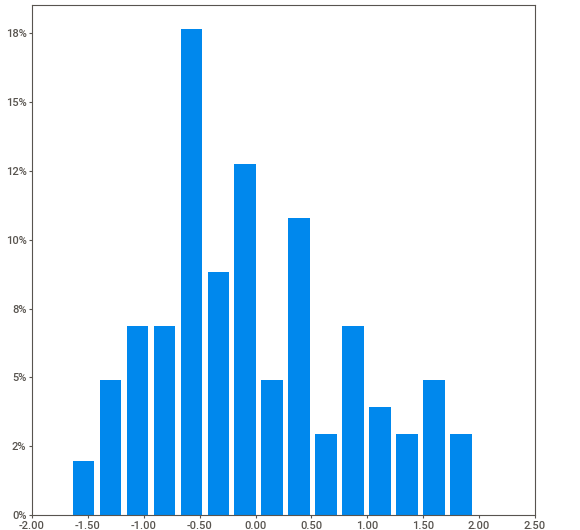
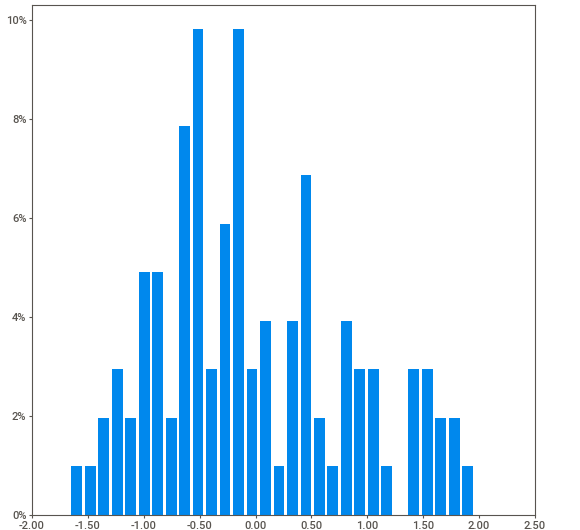
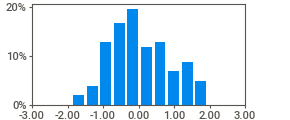
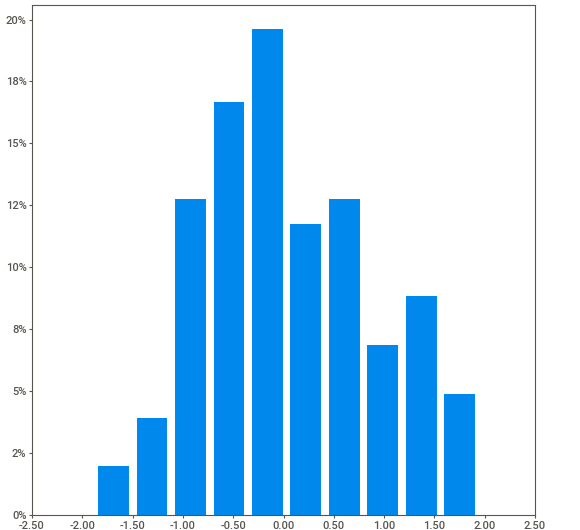
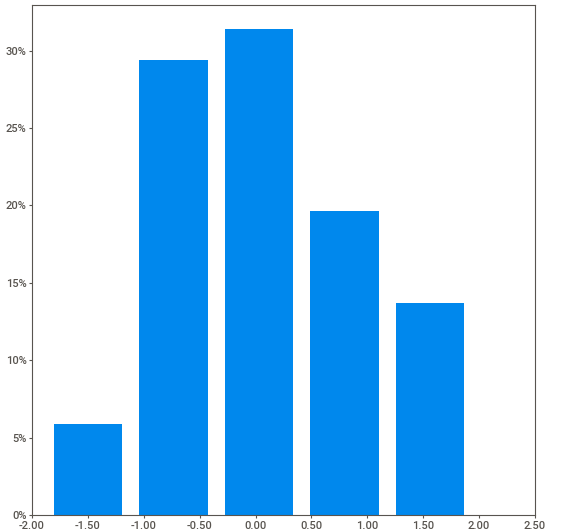
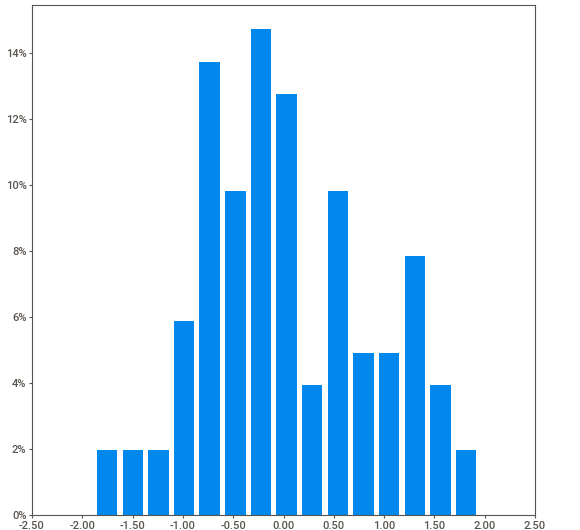
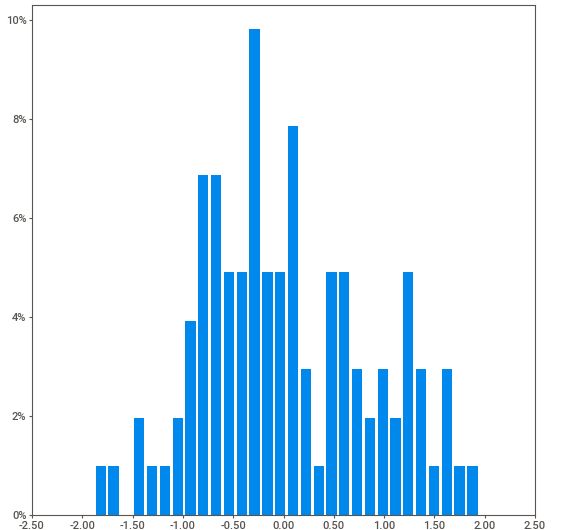
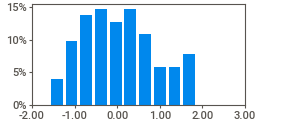
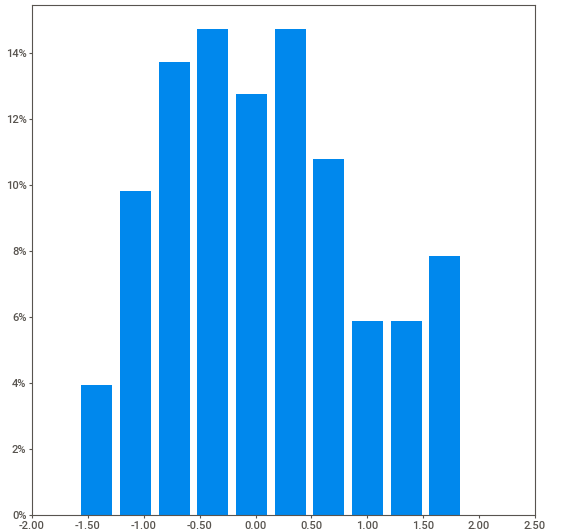
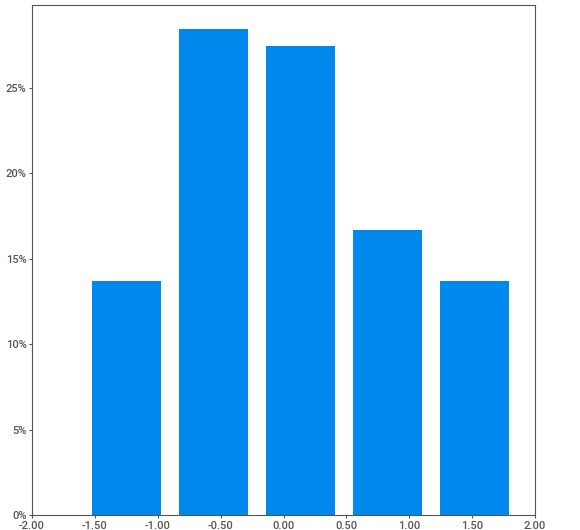
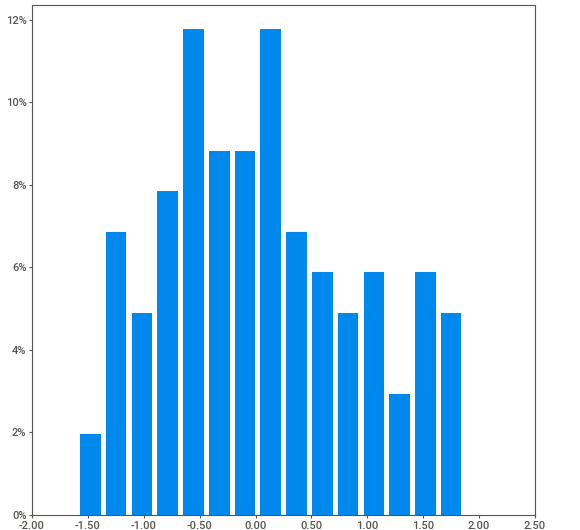
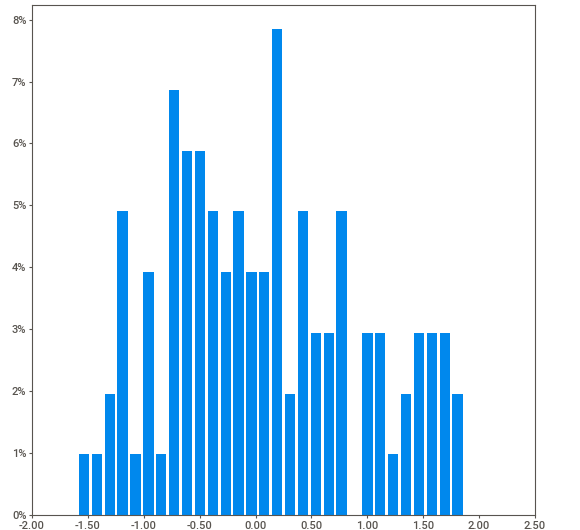
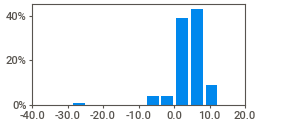
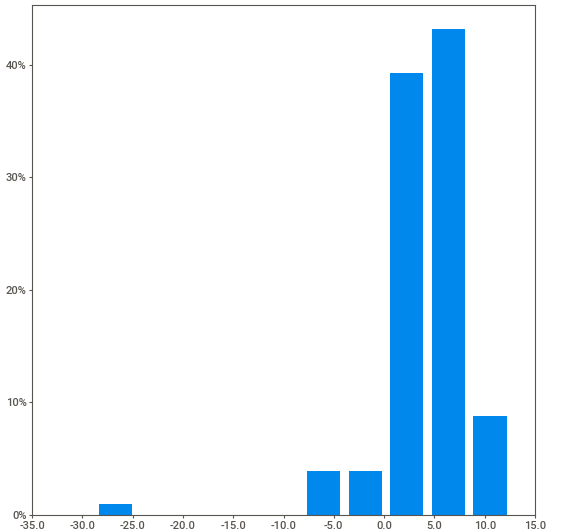
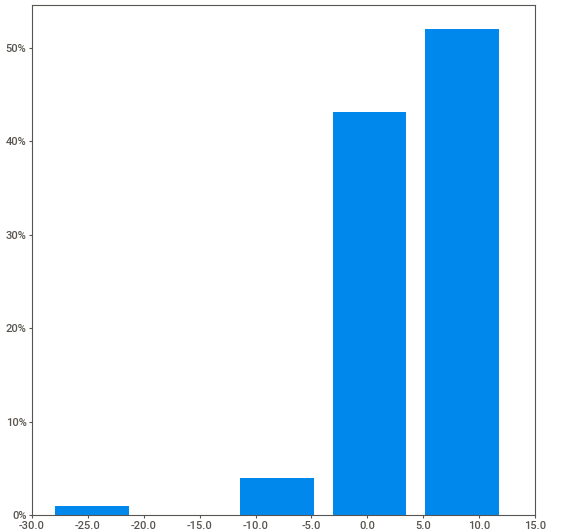
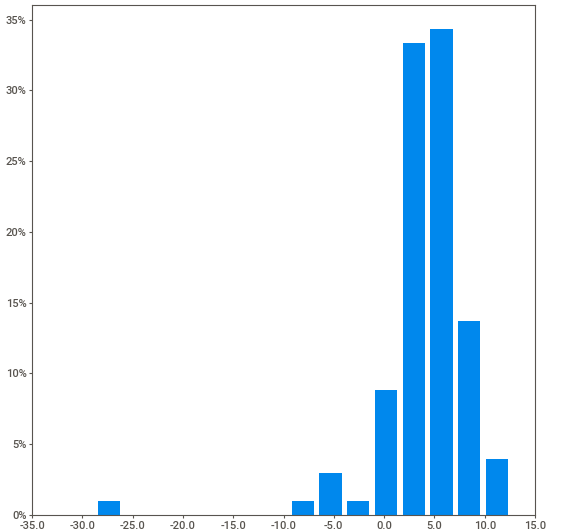
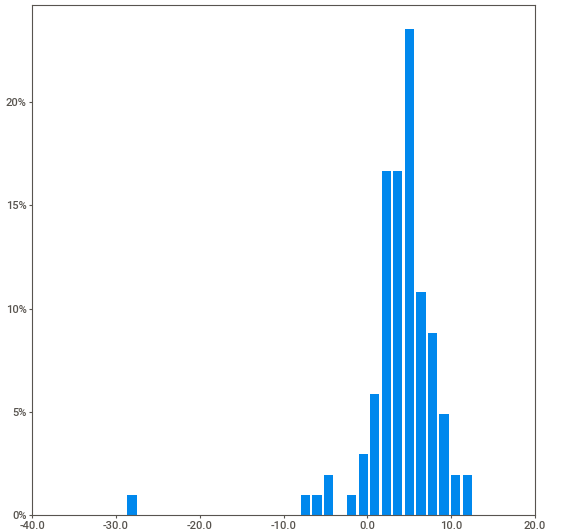
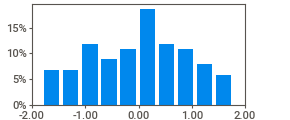
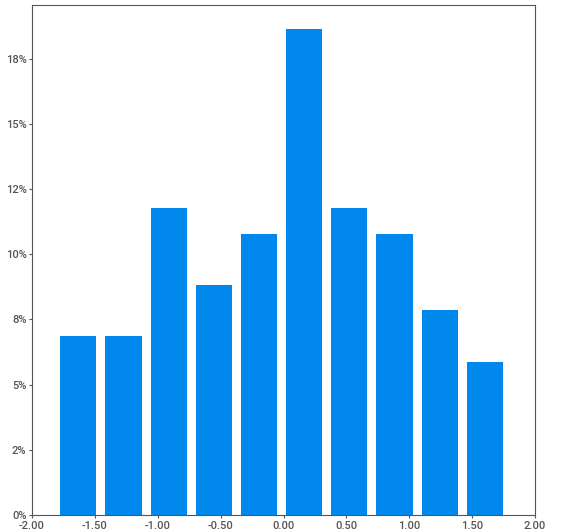
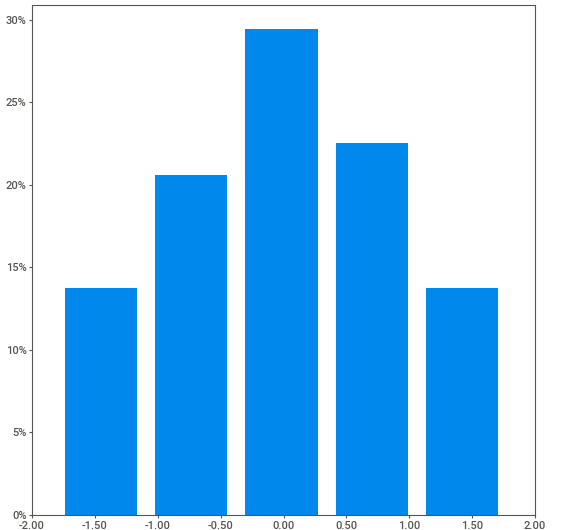
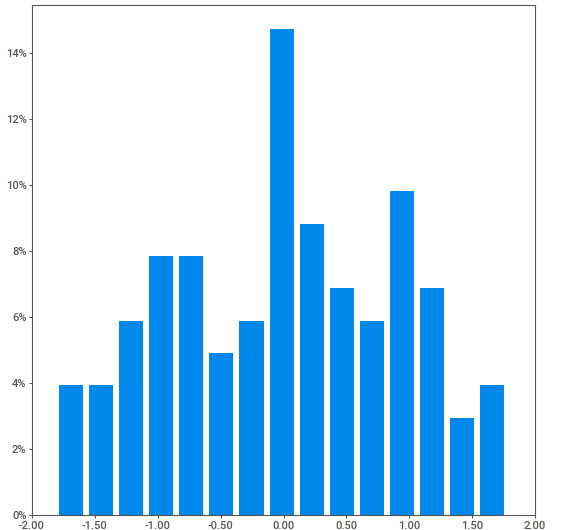
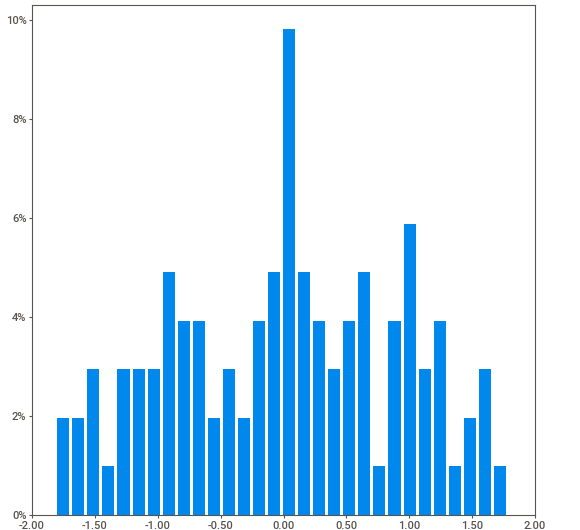
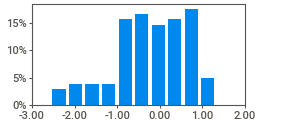
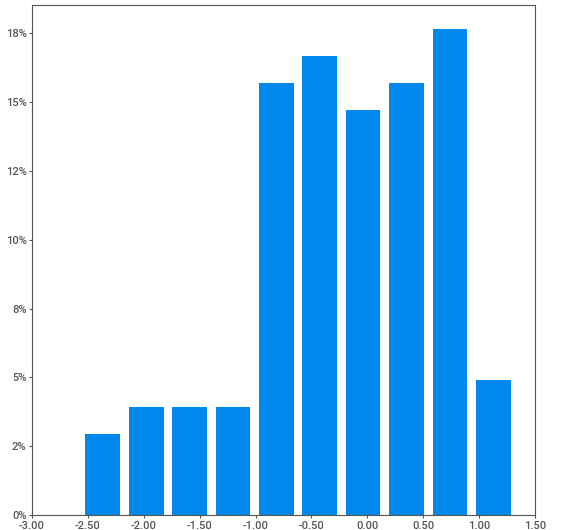
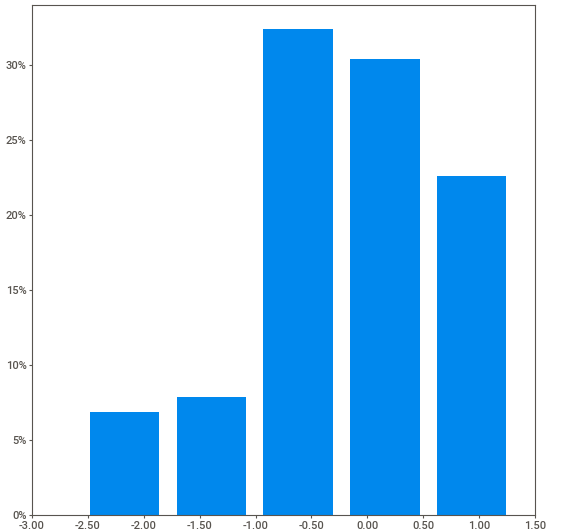
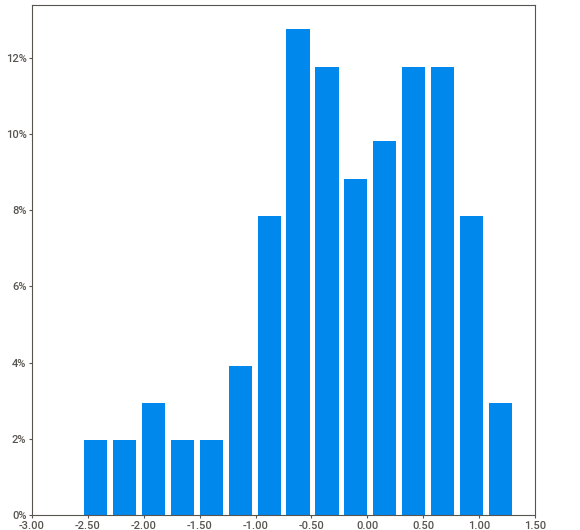
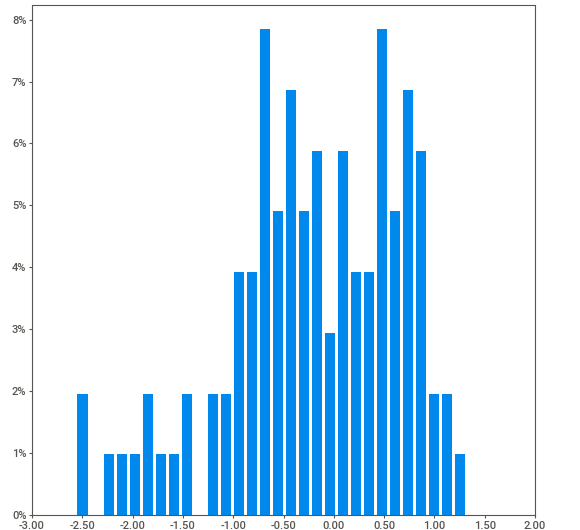
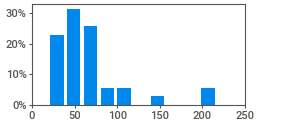
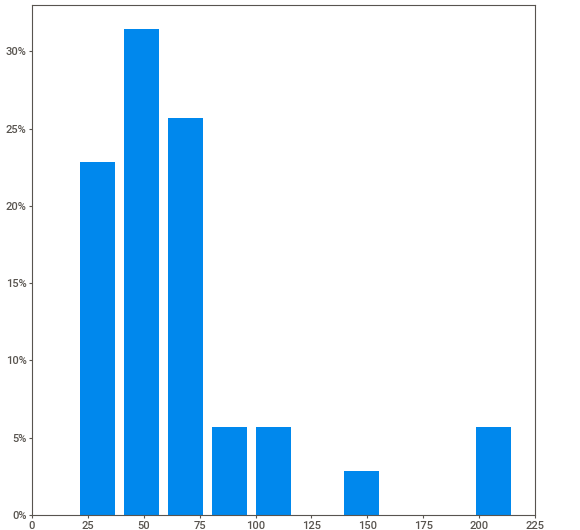
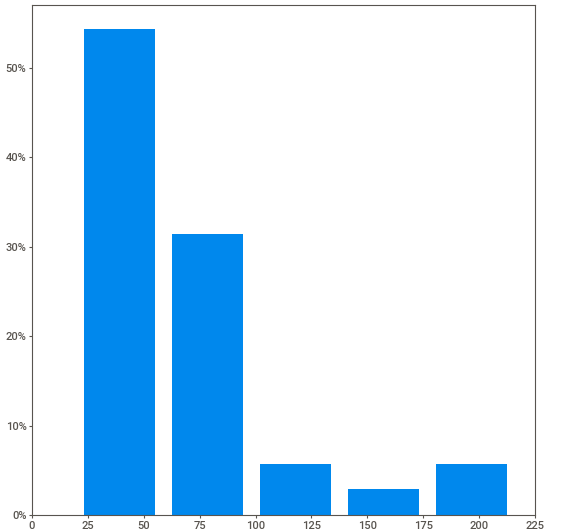
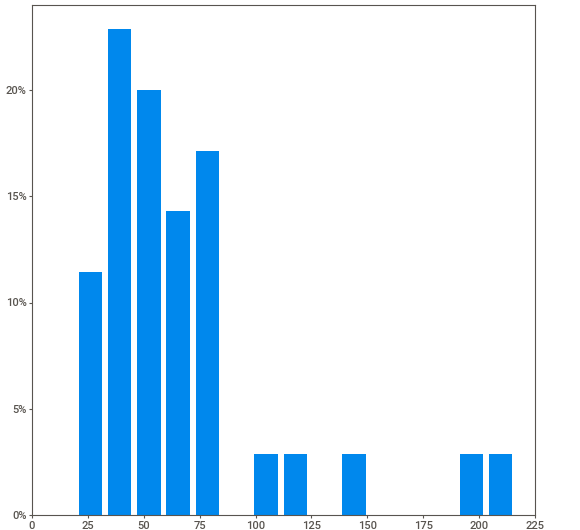
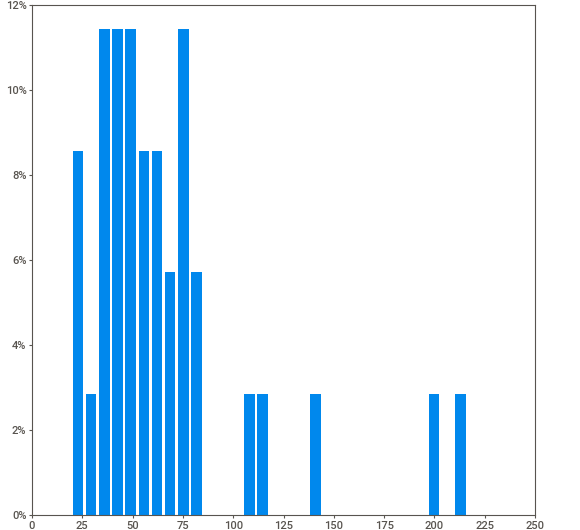
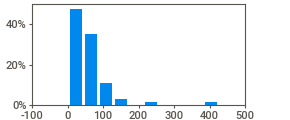
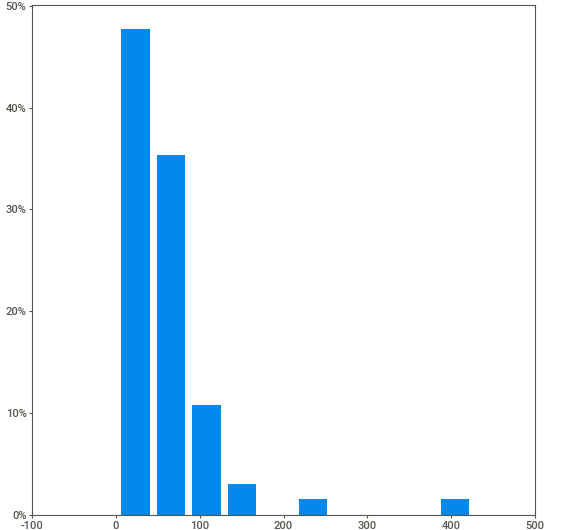
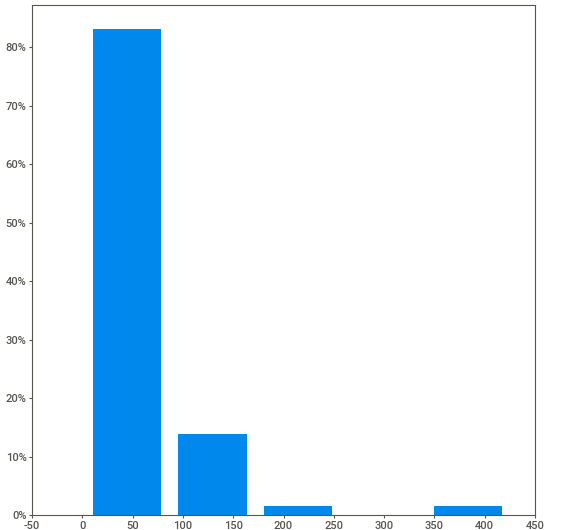
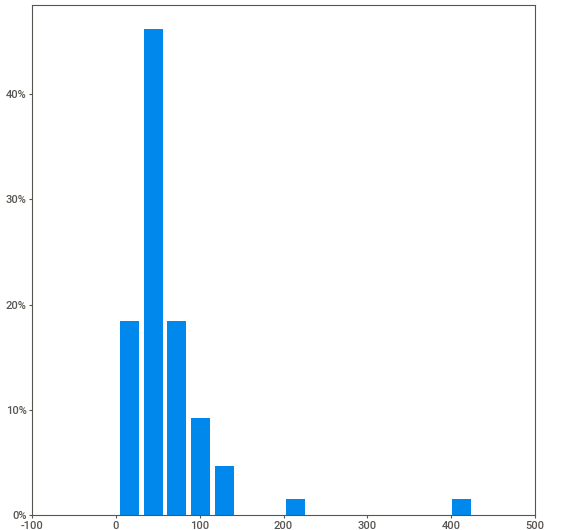
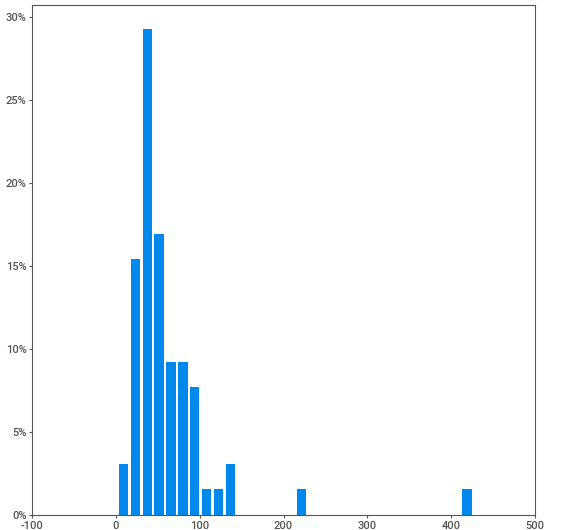
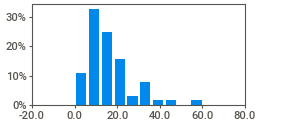
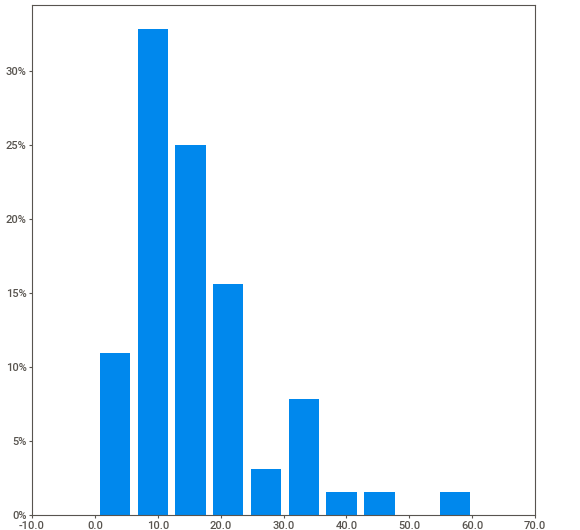
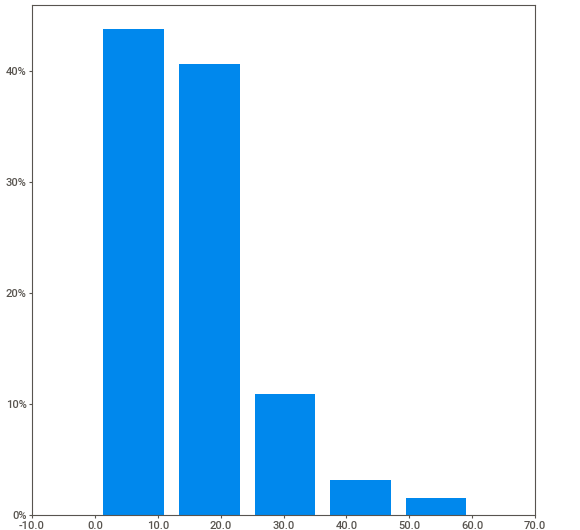
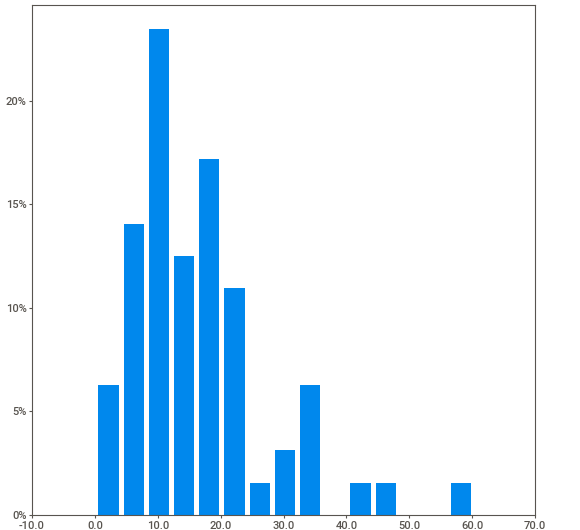
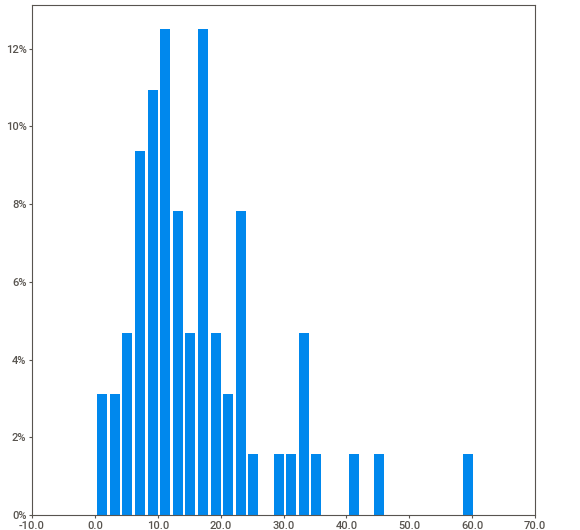
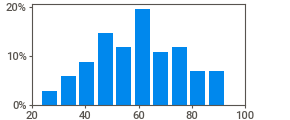
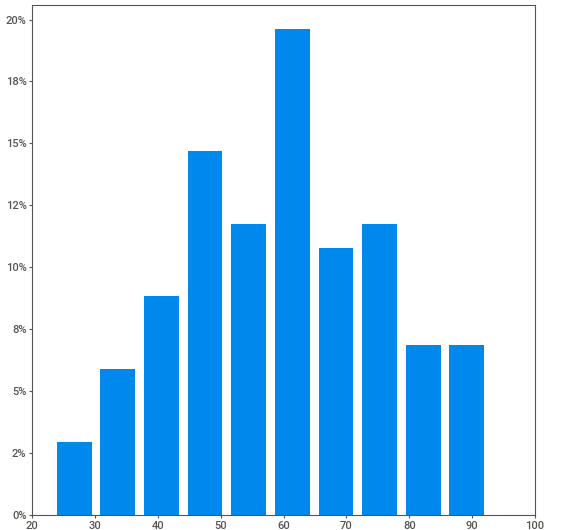
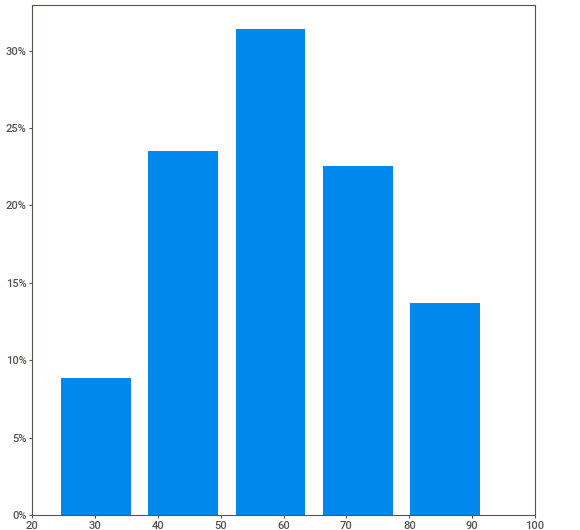
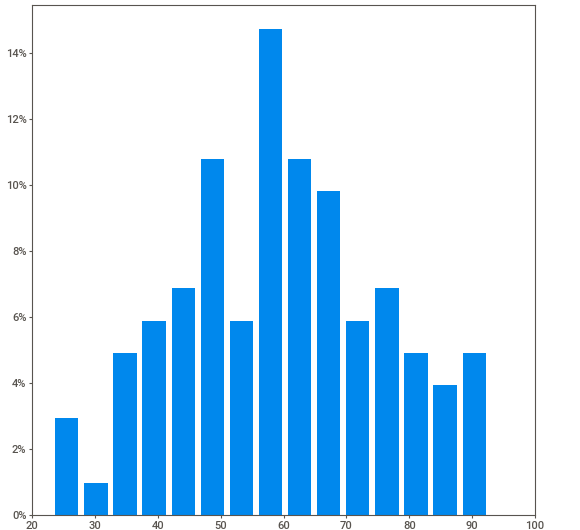
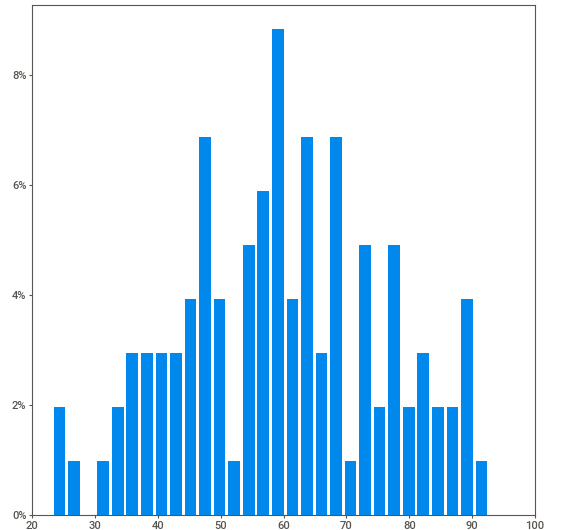
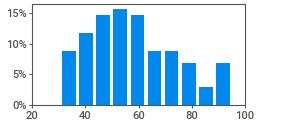
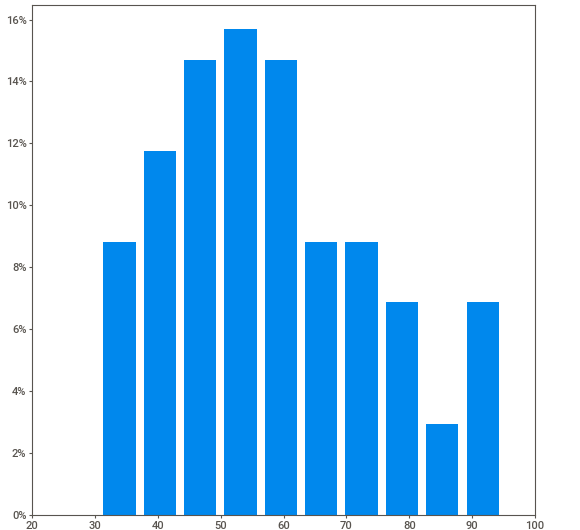
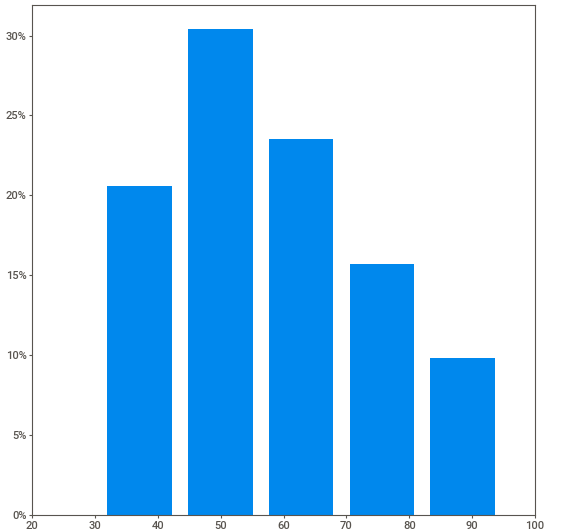
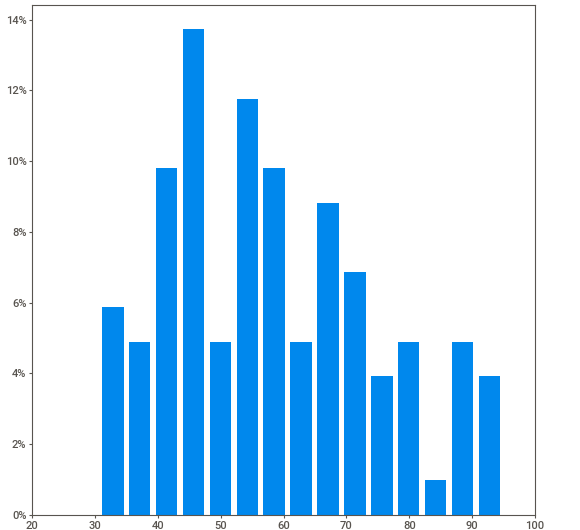
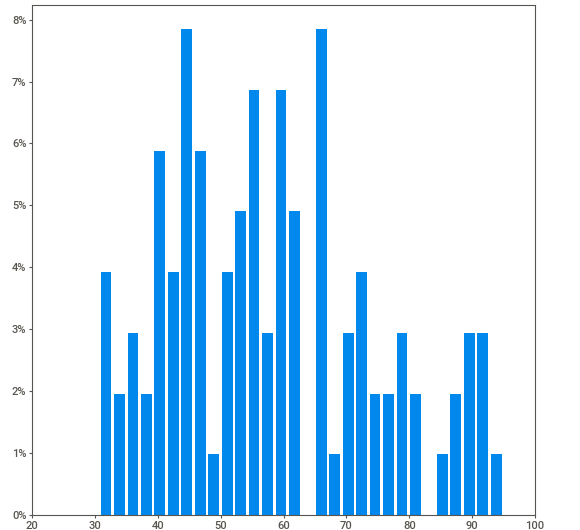
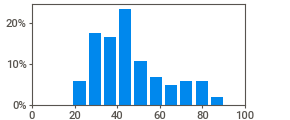
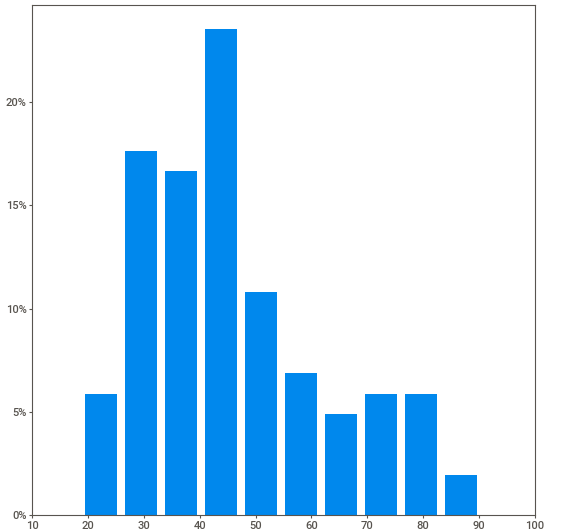
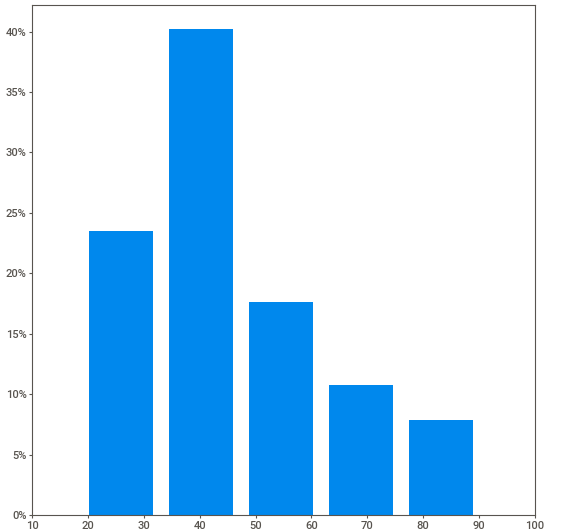
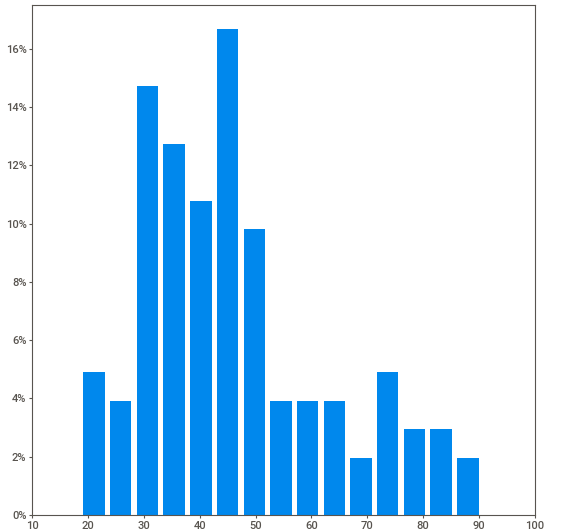
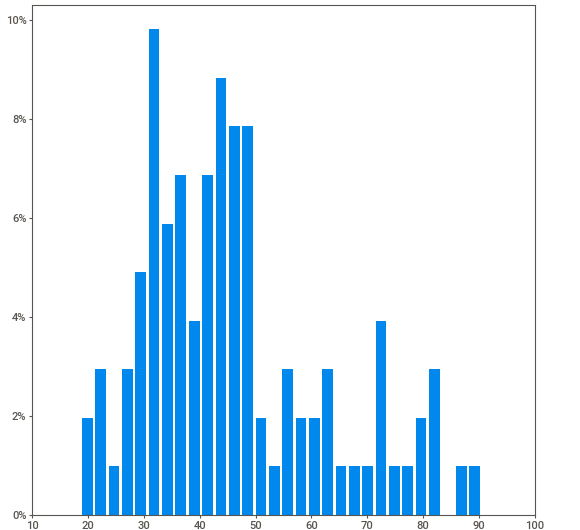
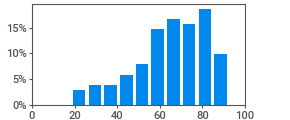
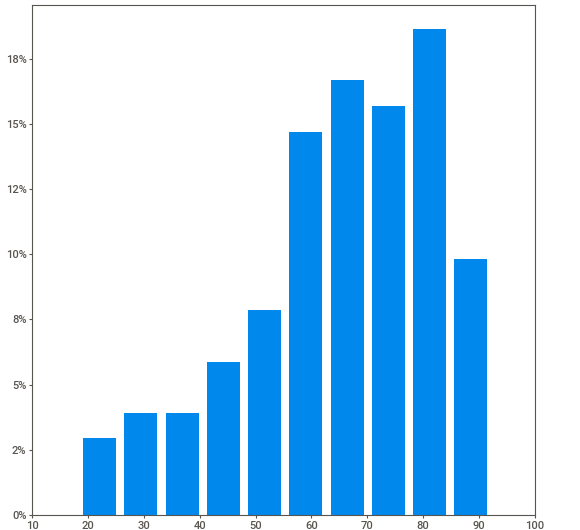
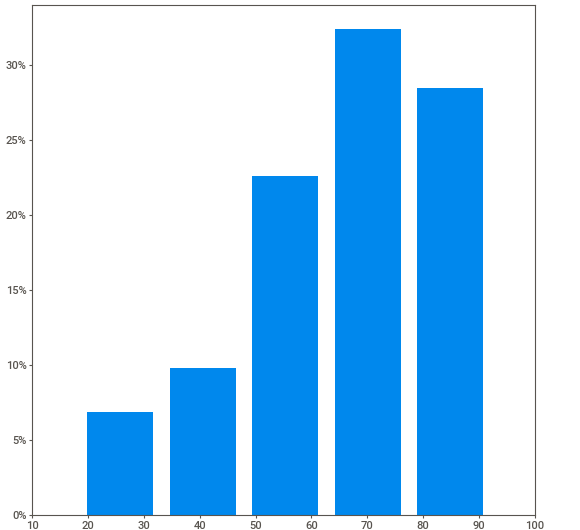
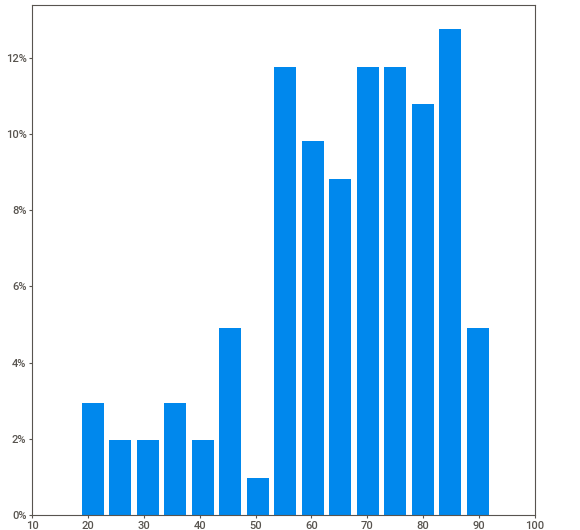
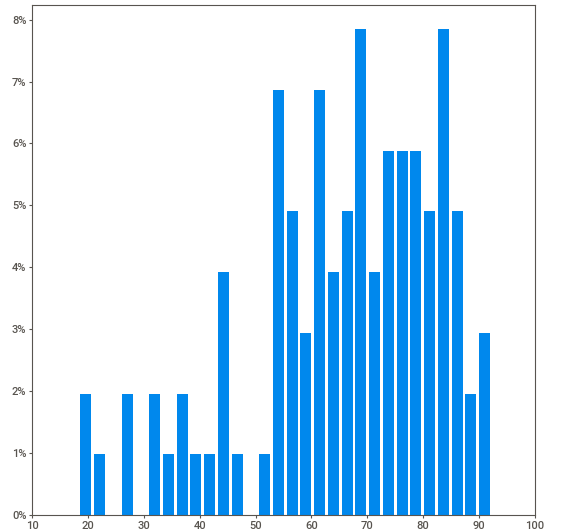
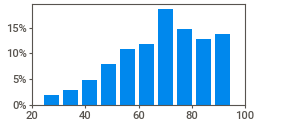
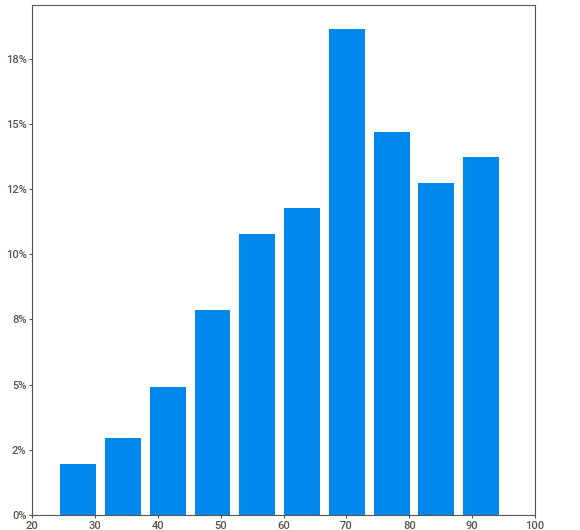
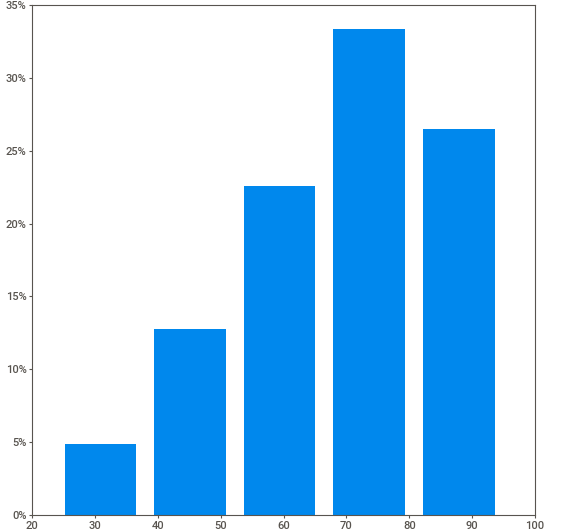
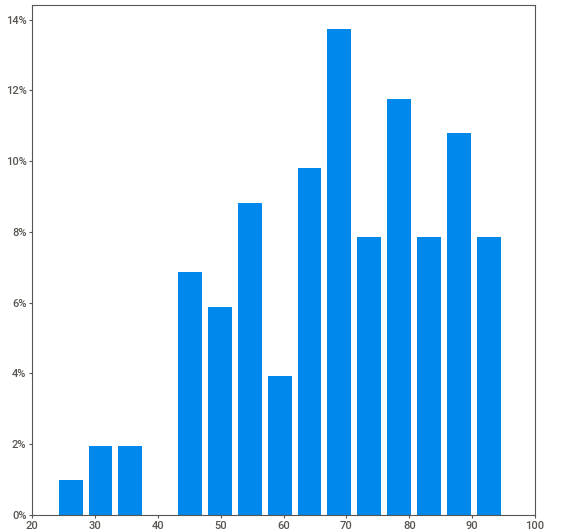
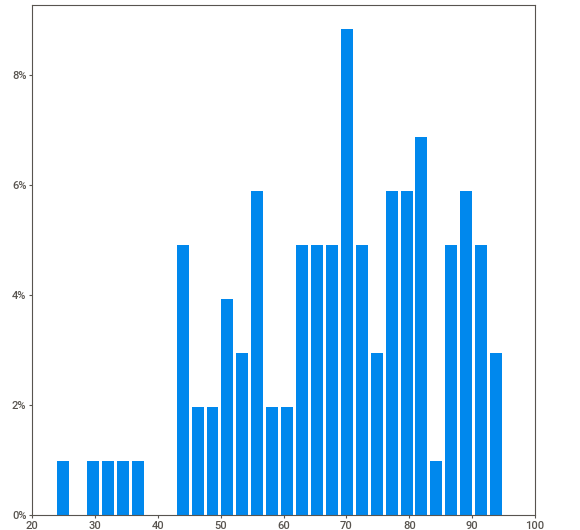
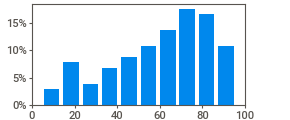
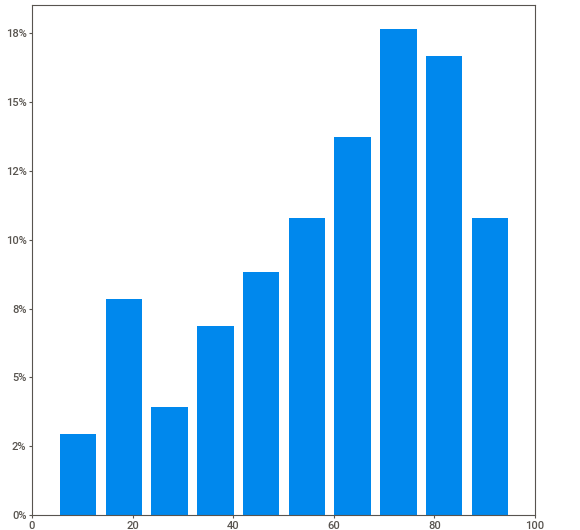
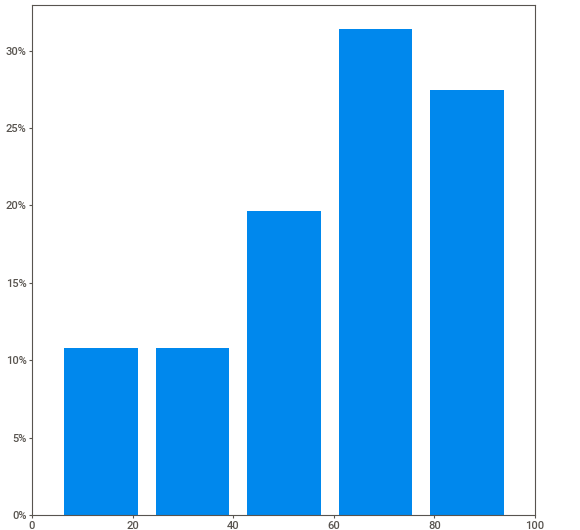
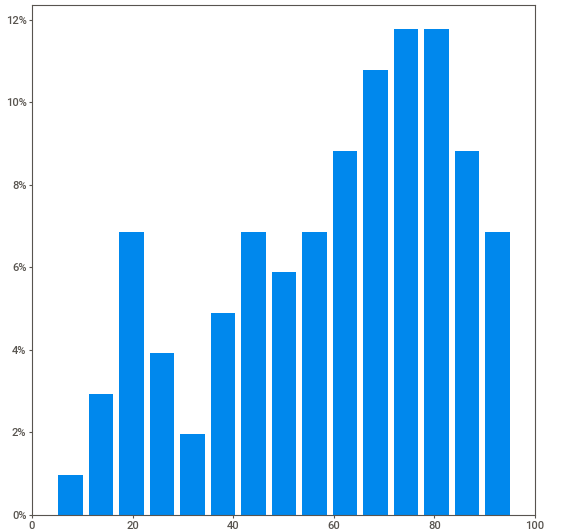
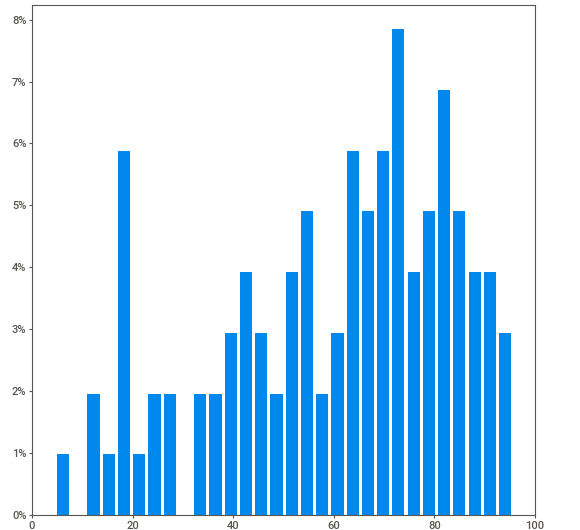
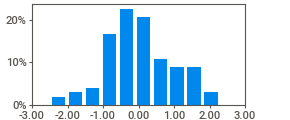
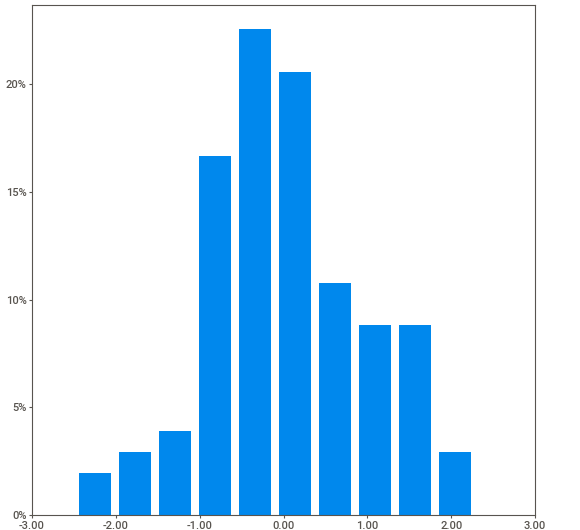
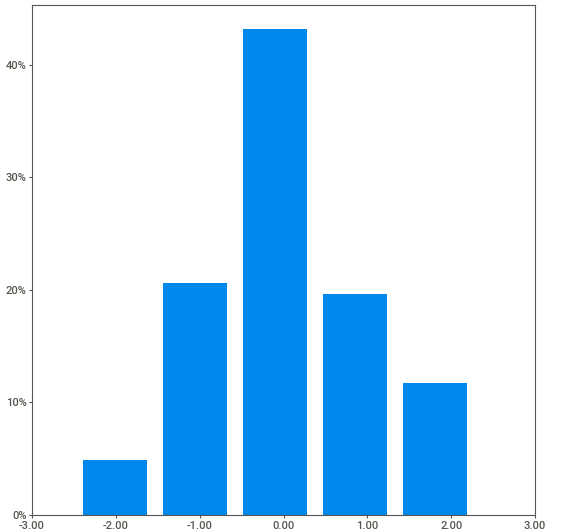
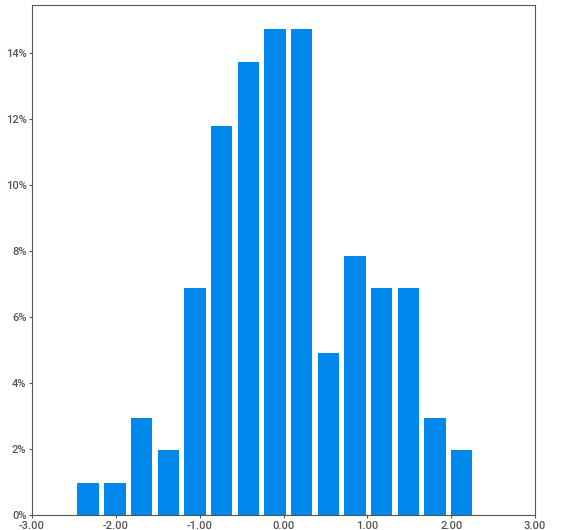
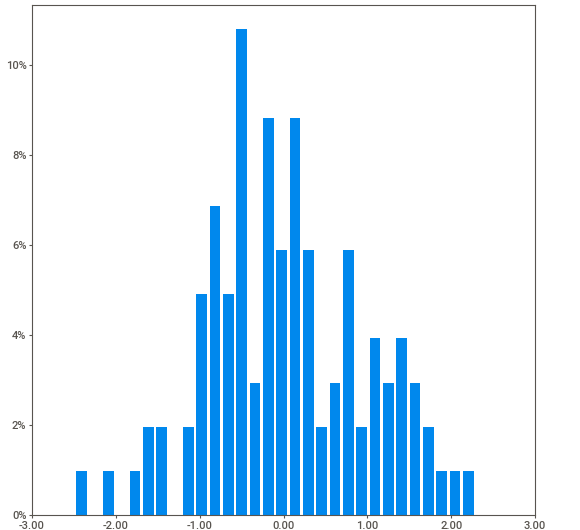
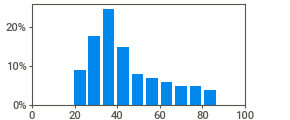
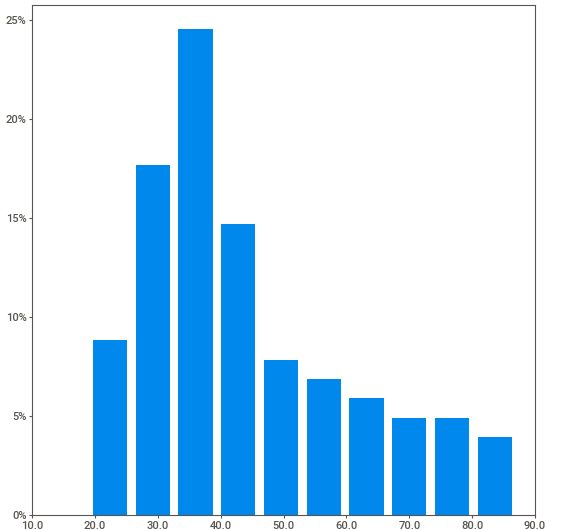
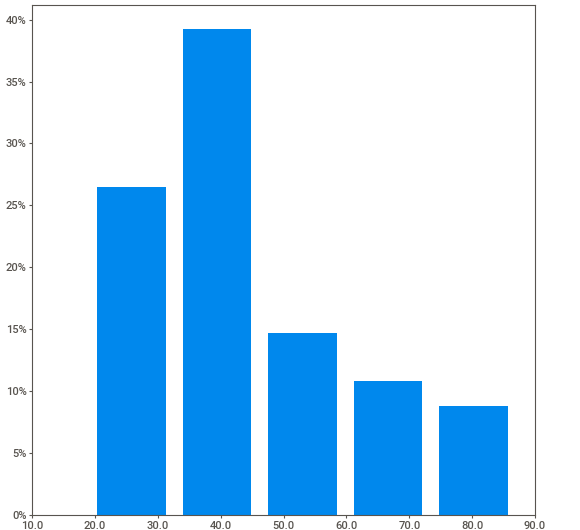
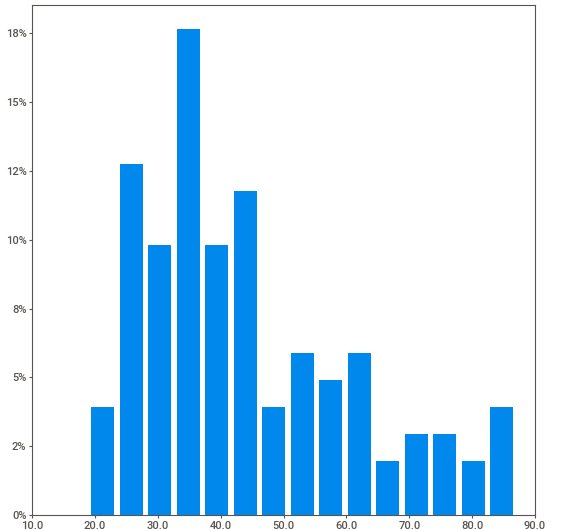
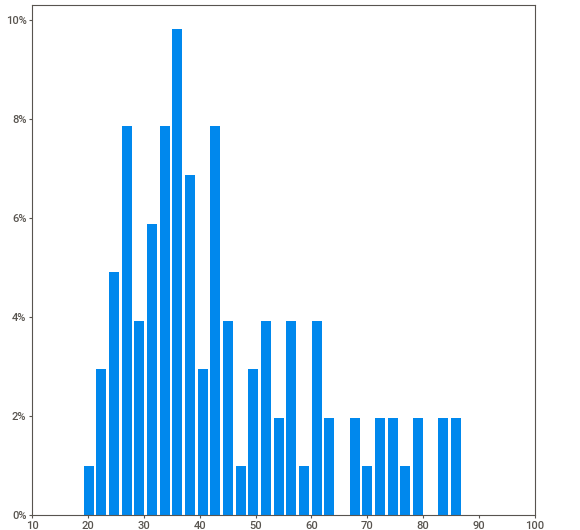
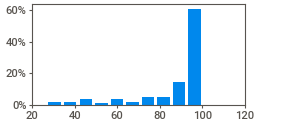
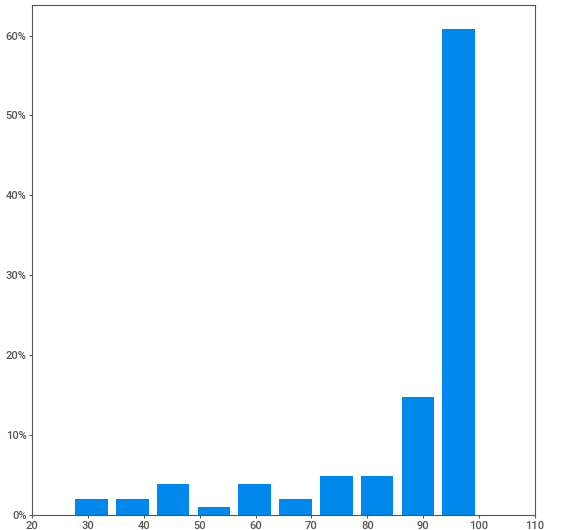
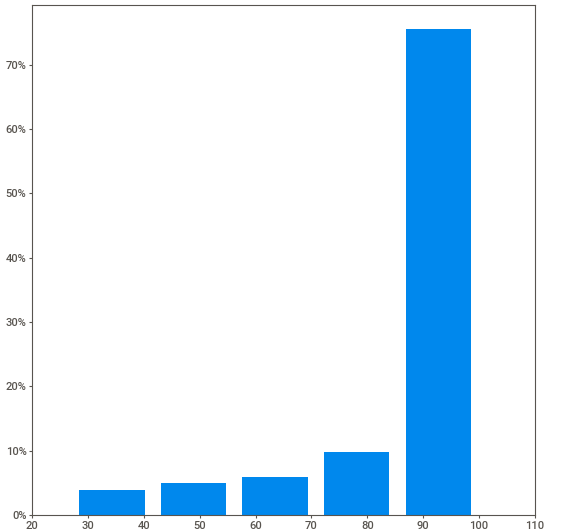
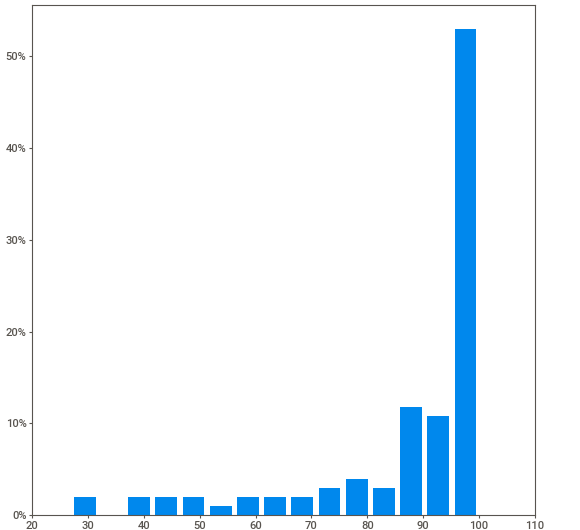
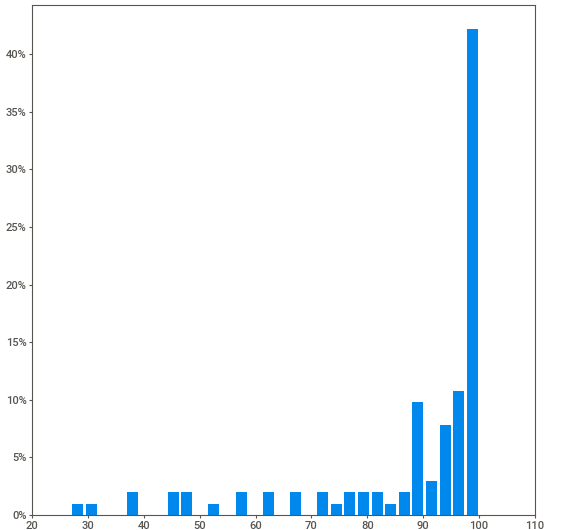
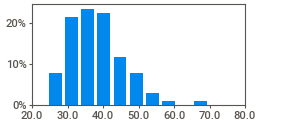
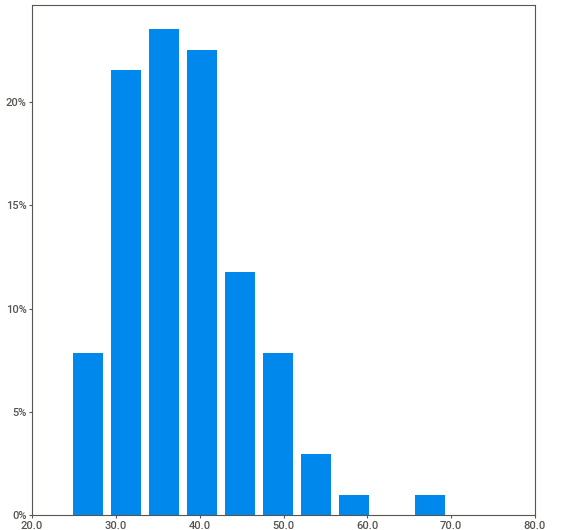
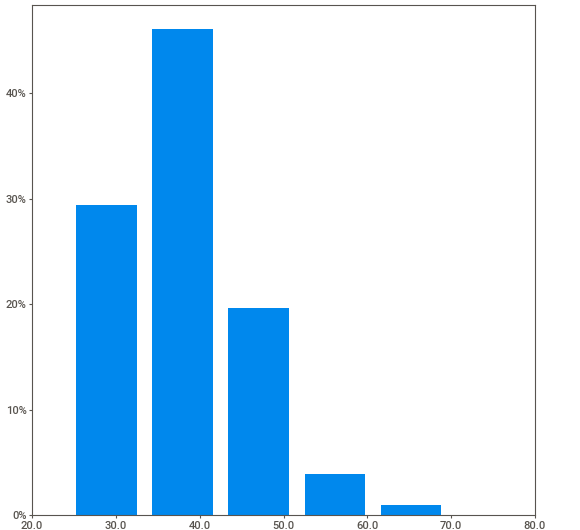
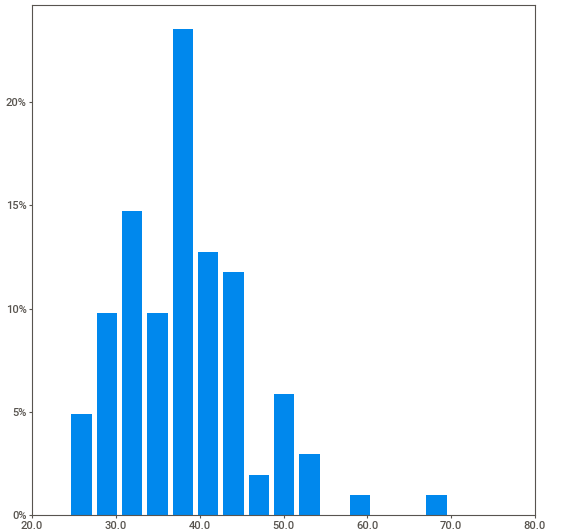
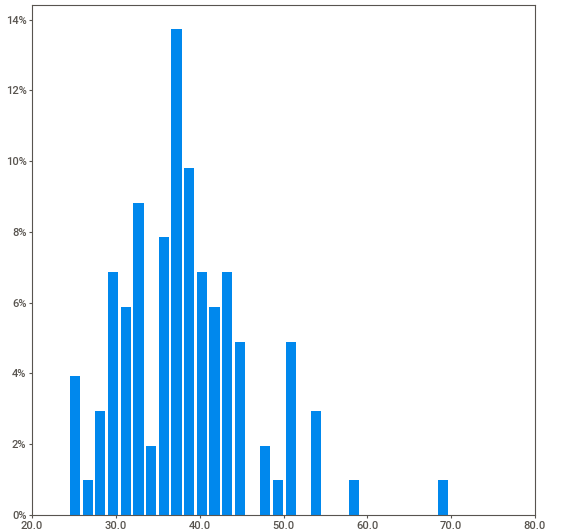
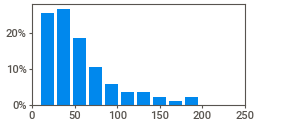
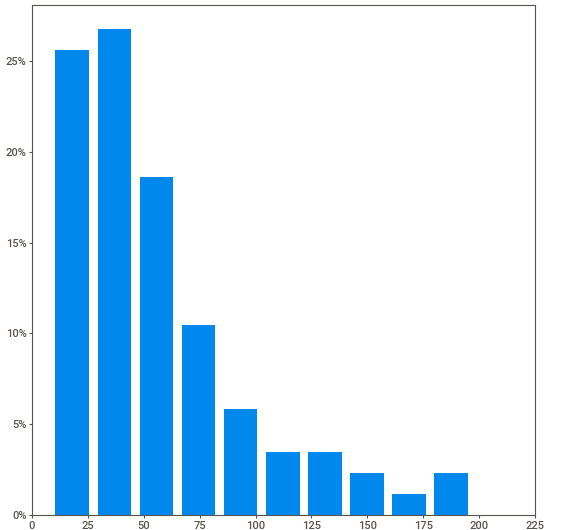
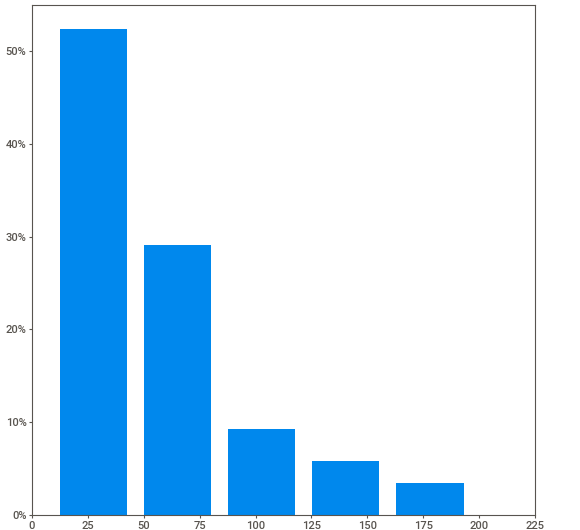
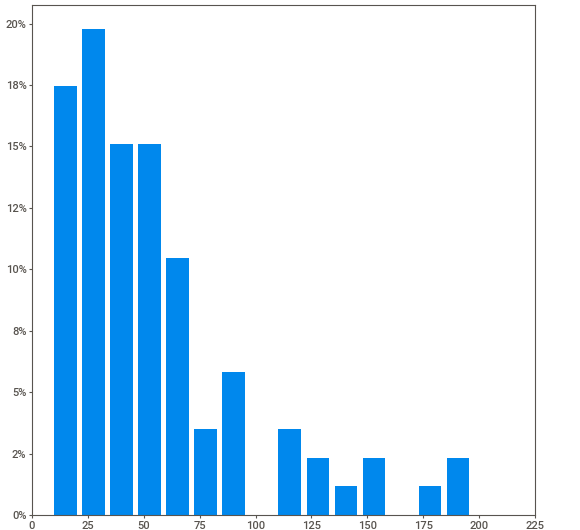
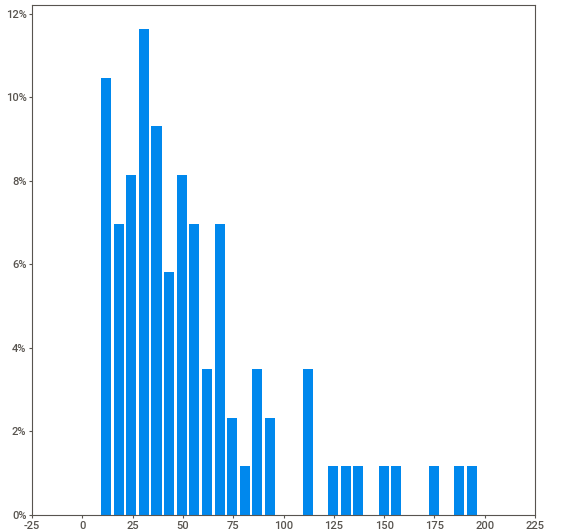
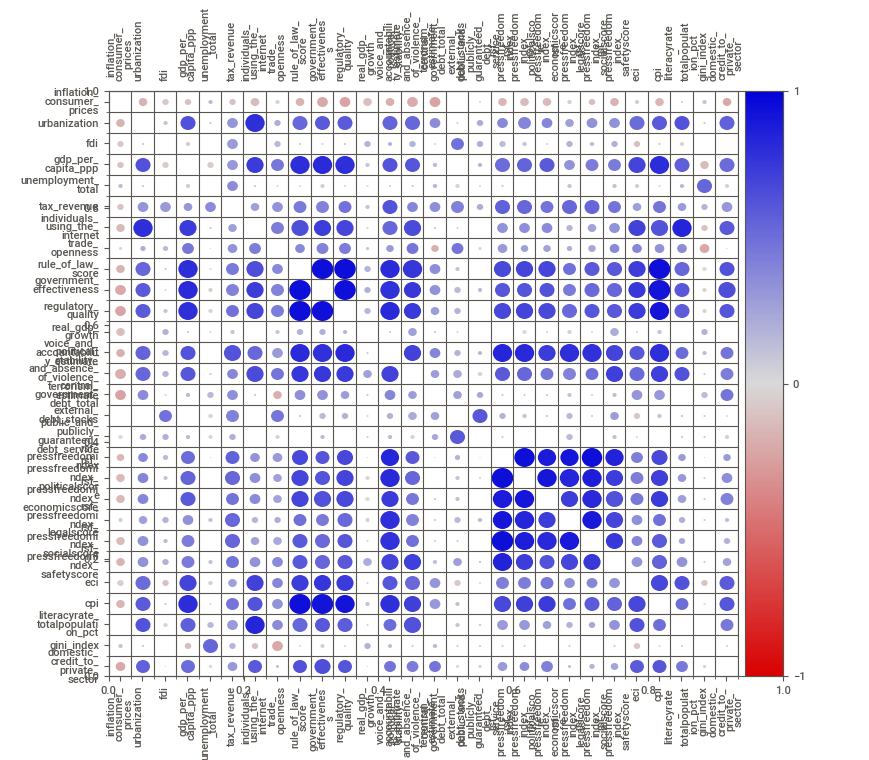
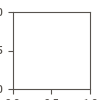

In [516]:
report = sv.analyze(df)
report.show_notebook()

### 1.4 Plot the distribution of the target variable (cpi)   
The Corruption Perceptions Index (CPI) is a measure of corruption in the public sector, with a lower score indicating higher levels of corruption. 

In [517]:
ggplot(df, aes('cpi')) + \
    geom_histogram(aes(y='..density..'), bins=30, alpha=0.5) + \
    geom_density(size=1.2, alpha=0.7) + \
    ggtitle("Distribution of CPI Score (2022)") + \
    xlab("CPI score (2022)") + \
    ylab("Density") + \
    theme(panel_grid_major_x=element_blank())

There is a clear right skew in the distribution of the CPI. This means that more countries have lower CPI scores (i.e. are more corrupt) and fewer countries have higher CPI scores (i.e. are less corrupt). 

## Question 2  
Create the outcome variable ```corruption``` for our classification model, i.e.:
- If ```CPI``` $\geq$ 50, then the country is classified as ```NotCorrupt``` and assigned to class ```0```.
- Otherwise, the country is classified as ```Corrupt``` and assigned to class ```1```.

In [518]:
df['corruption'] = df['cpi'].apply(lambda x: 0 if x >= 50 else 1)

In [519]:
df['corruption'].value_counts()

corruption
1    69
0    33
Name: count, dtype: int64

While Section 1.4 already referenced this, here we see more clearly that because the distribution of the CPI is right-skewed, with our above classification of the outcome variable, ```"corruption"```, we will have an **imbalanced dataset**. We will need to take this into account when building our classification models and choosing evaluation metrics.

## Question 3
Before we create a baseline model, we will first preprocess the data. We will:  
- Drop the columns that are not useful for our model (e.g. country name, year, etc.)
- Standardize the data
- Impute missing values using MICE

Let us consider features that we can straight away drop from our dataset:
- ```"country"```: This is a string variable and does not provide any information that can be used to predict corruption.
- ```"central_government_debt_total"```: This variable has a lot of missing values (65.7%). We drop this variable as imputing such a large number of missing values can introduce bias in our model.

In [520]:
filtered_df = df.drop(['country', 'central_government_debt_total'], axis=1)
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   inflation_consumer_prices                                       97 non-null     float64
 1   urbanization                                                    102 non-null    float64
 2   fdi                                                             98 non-null     float64
 3   gdp_per_capita_ppp                                              102 non-null    float64
 4   unemployment_total                                              101 non-null    float64
 5   tax_revenue                                                     70 non-null     float64
 6   individuals_using_the_internet                                  97 non-null     float64
 7   trade_openness                                       

We standardize the numerical features in our dataset using the ```StandardScaler``` from ```sklearn.preprocessing``` so that all the features have a mean of 0 and a standard deviation of 1. This is important as it ensures that all the features are on the same scale and prevents features with larger scales (such as ```"gdp_per_capita_ppp"```) from dominating the model. 

In [521]:
scaler = StandardScaler()
numeric_cols = [col for col in filtered_df.columns if col != 'corruption']
filtered_df[numeric_cols] = scaler.fit_transform(filtered_df[numeric_cols])

Then, we split the data into training and test sets, **stratifying by the target variable ```"corruption"```** to ensure that the distribution of the target variable is the same in both the training and test sets. This is important as we have an imbalanced dataset with more observations in the ```Corrupt``` class than the ```NotCorrupt``` class.

In [522]:
# train test split
X = filtered_df.drop(['cpi', 'corruption'], axis=1)
X = sm.add_constant(X)
y = filtered_df['corruption'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [523]:
# check
class_distribution = np.bincount(y_test) / len(y_test)
print("Class Imbalance (Proportions) - Test Set:")
print(f"Class 0 (Not Corrupt): {class_distribution[0]:.3f}, Class 1 (Corrupt): {class_distribution[1]:.3f}")
class_distribution_train = np.bincount(y_train) / len(y_train)
print("\nClass Imbalance (Proportions) - Train Set:")
print(f"Class 0 (Not Corrupt): {class_distribution_train[0]:.3f}, Class 1 (Corrupt): {class_distribution_train[1]:.3f}")

Class Imbalance (Proportions) - Test Set:
Class 0 (Not Corrupt): 0.308, Class 1 (Corrupt): 0.692

Class Imbalance (Proportions) - Train Set:
Class 0 (Not Corrupt): 0.329, Class 1 (Corrupt): 0.671


Now, we proceed to **impute missing values** by MICE, **first in the training set and then in the test set so as to avoid data leakage**.

In [524]:
np.random.seed(42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

df_train_imp = mf.ImputationKernel(
    pd.concat([X_train, y_train], axis=1),
    save_all_iterations_data=True,
    random_state=100
)

# Run the MICE algorithm for 5 iterations
df_train_imp.mice(5)
# Return the completed dataset with missing values imputed
df_train_imp_mice = df_train_imp.complete_data(dataset=0)

X_train_imputed = df_train_imp_mice.drop('corruption', axis=1)

In [525]:
X_train_imputed.isnull().sum()

const                                                             0
inflation_consumer_prices                                         0
urbanization                                                      0
fdi                                                               0
gdp_per_capita_ppp                                                0
unemployment_total                                                0
tax_revenue                                                       0
individuals_using_the_internet                                    0
trade_openness                                                    0
rule_of_law_score                                                 0
government_effectiveness                                          0
regulatory_quality                                                0
real_gdp_growth                                                   0
voice_and_accountability_estimate                                 0
political_stability_and_absence_of_violence_terr

In [526]:
np.random.seed(42)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

df_test_imp = mf.ImputationKernel(
    pd.concat([X_test, y_test], axis=1),
    save_all_iterations_data=True,
    random_state=100
)

# Run the MICE algorithm for 5 iterations
df_test_imp.mice(5)
# Return the completed dataset with missing values imputed
df_test_imp_mice = df_test_imp.complete_data(dataset=0)

X_test_imputed = df_test_imp_mice.drop('corruption', axis=1)

In [527]:
X_test_imputed.isnull().sum()

const                                                             0
inflation_consumer_prices                                         0
urbanization                                                      0
fdi                                                               0
gdp_per_capita_ppp                                                0
unemployment_total                                                0
tax_revenue                                                       0
individuals_using_the_internet                                    0
trade_openness                                                    0
rule_of_law_score                                                 0
government_effectiveness                                          0
regulatory_quality                                                0
real_gdp_growth                                                   0
voice_and_accountability_estimate                                 0
political_stability_and_absence_of_violence_terr

### 3.1 Baseline model: logistic regression

For the baseline model, I chose **Logistic Regression**, a simple and interpretable model that is commonly used for binary classification tasks. Logistic regression estimates the probability that a given observation belongs to a particular class (Corrupt = 1 or NotCorrupt = 0) using the logistic (sigmoid) function. For this model, I chose to use all the features in ```filtered_df``` without performing any further feature selection. The goal of this is to **establish a benchmark** for the performance of more complex models that we will build in subsequent questions. 

In [528]:
logit_model = LogisticRegression()
# fit this instance to the training set
_ = logit_model.fit(X_train_imputed, y_train)

Next, generate predicted probabilities on both the training and test sets from our baseline logistic regression model using ```predict_proba```:

In [529]:
# generate predictions on the training and test set
train_probas_model1 = logit_model.predict_proba(X_train_imputed)[:, 1]
test_probas_model1 = logit_model.predict_proba(X_test_imputed)[:, 1]

Then, convert the predicted probabilities to predicted classes using a threshold of 0.5:

In [530]:
# convert predicted scores to binary predictions for the training and test set
train_preds_model1 = np.where(train_probas_model1 >= 0.5, 1, 0)
test_preds_model1 = np.where(test_probas_model1 >= 0.5, 1, 0)

### 3.2 Model evaluation  
After obtaining the predicted classes for the training and test sets, we evaluate the performance of our baseline model using several metrics. 
 
The first metric we will look at is the **confusion matrix** for both the training and test sets. The confusion matrix provides a graphical breakdown of the true positive, true negative, false positive, and false negative predictions made by the model. This allows us to understand how well the model is performing in terms of correctly classifying observations.  
- True positives are corrupt countries that are correctly classified as ```Corrupt``` (1)
- True negatives are not corrupt countries that are correctly classified as ```NotCorrupt``` (0)
- False positives are not corrupt countries that are incorrectly classified as ```Corrupt``` (1)
- False negatives are corrupt countries that are incorrectly classified as ```NotCorrupt``` (0)  

For our application, since we just want to classify countries according to their corruption level, **predicting whether a country is corrupt or not is equally important**, so we will not emphasize false positives or false negatives.  

In [531]:
# confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, train_preds_model1)

# Extract TP, FP, FN, TN from confusion matrix
TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()

# Print the counts
print(f"True Negatives (TN): {TN_train}")
print(f"False Positives (FP): {FP_train}")
print(f"False Negatives (FN): {FN_train}")
print(f"True Positives (TP): {TP_train}")

# Convert confusion matrix to a DataFrame
conf_matrix_df_train = pd.DataFrame(
    conf_matrix_train, 
    columns=["Predicted 0", "Predicted 1"], 
    index=["Actual 0", "Actual 1"]
)

# Melt the confusion matrix DataFrame to long format
conf_matrix_long_train = conf_matrix_df_train.reset_index().melt(id_vars="index", value_vars=["Predicted 0", "Predicted 1"])
conf_matrix_long_train.columns = ["Actual", "Predicted", "Count"]

# Define a mapping of coordinates to labels
label_map = {
    ("Actual 0", "Predicted 0"): "TN",
    ("Actual 0", "Predicted 1"): "FP",
    ("Actual 1", "Predicted 0"): "FN",
    ("Actual 1", "Predicted 1"): "TP",
}

# Add annotations for TP, FP, FN, TN counts
conf_matrix_long_train['Annotation'] = conf_matrix_long_train.apply(
    lambda row: f"{label_map[(row['Actual'], row['Predicted'])]}: {row['Count']}", axis=1
)


# Create confusion matrix plot with Lets-Plot
conf_matrix_plot_train = ggplot(conf_matrix_long_train, aes(x='Predicted', y='Actual', fill='Count')) + \
    geom_tile() + \
    geom_text(aes(label='Annotation'), size=10, color='black', vjust=0.5, hjust=0.5) + \
    scale_fill_gradient(low='white', high='blue') + \
    ggtitle('Confusion Matrix') + \
    xlab('Predicted') + \
    ylab('Actual') + \
    coord_fixed(ratio=1) + \
    theme_minimal() + \
    theme(
        legend_position='right',
        plot_margin=0  # FIX: Remove element_blank() and use 0
    )

conf_matrix_plot_train

True Negatives (TN): 25
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 51


In [532]:
# confusion matrix for the testing set
conf_matrix = confusion_matrix(y_test, test_preds_model1)

# Extract TP, FP, FN, TN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Print the counts
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Convert confusion matrix to a DataFrame in long format for Lets-Plot
conf_matrix_df = pd.DataFrame(conf_matrix, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Melt the confusion matrix DataFrame to long format
conf_matrix_long = conf_matrix_df.reset_index().melt(id_vars="index", value_vars=["Predicted 0", "Predicted 1"])
conf_matrix_long.columns = ["Actual", "Predicted", "Count"]

# Define a mapping of coordinates to labels
label_map = {
    ("Actual 0", "Predicted 0"): "TN",
    ("Actual 0", "Predicted 1"): "FP",
    ("Actual 1", "Predicted 0"): "FN",
    ("Actual 1", "Predicted 1"): "TP",
}

# Add annotations for TP, FP, FN, TN counts
conf_matrix_long['Annotation'] = conf_matrix_long.apply(
    lambda row: f"{label_map[(row['Actual'], row['Predicted'])]}: {row['Count']}", axis=1
)

# Create confusion matrix plot with Lets-Plot
conf_matrix_plot = ggplot(conf_matrix_long, aes(x='Predicted', y='Actual', fill='Count')) + \
    geom_tile() + \
    geom_text(aes(label='Annotation'), size=10, color='black', vjust=0.5, hjust=0.5) + \
    scale_fill_gradient(low='white', high='blue') + \
    ggtitle('Confusion Matrix') + \
    xlab('Predicted') + \
    ylab('Actual') + \
    coord_fixed(ratio=1) + \
    theme_minimal() + \
    theme(
        legend_position='right',
        plot_margin=0  # FIX: Remove element_blank() and use 0
    )
    
conf_matrix_plot

True Negatives (TN): 7
False Positives (FP): 1
False Negatives (FN): 2
True Positives (TP): 16


The confusion matrix for the training set shows that the **baseline model perfectly predicts the training data**. However, the confusion matrix for the test set shows that while the model still performs well, it does make some errors in classifying observations. This suggests that the **model is not performing as well on unseen data**. This is expected as the model has not been optimized and may be **overfitting** the training data.

We will also look at the following metrics to evaluate the performance of our baseline model, **noting that we have an imbalanced dataset**:
1. Balanced accuracy
2. F1 score
3. AUC-PR  

Justification for the choice of evaluation metrics:

- **Balanced accuracy**: The balanced accuracy is the average of the recall obtained on each class. It is a good metric to use when we have imbalanced classes in our dataset like in our case, where there are more observations in the ```Corrupt``` class than the ```NotCorrupt``` class. 
    - Using **accuracy** alone can be misleading in the case of imbalanced datasets as the model can achieve high accuracy by simply predicting the majority class, leading to the accuracy paradox. 
- **F1 score**: The F1 score is the harmonic mean of precision and recall. It is a good metric to use when we want to balance the trade-off between precision and recall. 
    - There is less of a need to focus on **precision** or **recall** in our application as predicting whether a country is corrupt or not is equally important. The F1 score provides a good balance between the two.
    - The **F beta score** is also not necessary in our case for the same reason.   
- **AUC-PR**: The Area Under the Precision-Recall curve metric is also chosen because of the imbalanced nature of our dataset. It is particularly useful when we are interested in the positive class (```Corrupt``` in our case) and want to evaluate the model's performance on the minority class.  
    - The **ROC-AUC** metric tends to be optimistic on imbalanced datasets as it is insensitive to the class distribution. The AUC-PR metric is more informative in our case.

In [533]:
# calculate balanced accuracy
balanced_accuracy_train_model1 = np.round(balanced_accuracy_score(y_train, train_preds_model1), 3)
balanced_accuracy_test_model1 = np.round(balanced_accuracy_score(y_test, test_preds_model1), 3)

# calculate f1 score
train_f1_model1 = np.round(f1_score(y_train, train_preds_model1), 3)
test_f1_model1 = np.round(f1_score(y_test, test_preds_model1), 3)

# calculate AUC-PR
train_auc_pr_model1 = np.round(average_precision_score(y_train, train_probas_model1), 3)
test_auc_pr_model1 = np.round(average_precision_score(y_test, test_probas_model1), 3)

# print the results
print(f"Balanced Accuracy (Train): {balanced_accuracy_train_model1}")
print(f"Balanced Accuracy (Test): {balanced_accuracy_test_model1}")

print(f"F1-Score (Train): {train_f1_model1}")
print(f"F1-Score (Test): {test_f1_model1}")

print(f"AUC-PR (Train): {train_auc_pr_model1}")
print(f"AUC-PR (Test): {test_auc_pr_model1}")

Balanced Accuracy (Train): 1.0
Balanced Accuracy (Test): 0.882
F1-Score (Train): 1.0
F1-Score (Test): 0.914
AUC-PR (Train): 1.0
AUC-PR (Test): 0.985


In [534]:
writer = MarkdownTableWriter()
writer.table_name = "Baseline logistic regression model"
writer.headers = ["Metric", "Training set", "Test set"]
writer.value_matrix = [
    ["Balanced Accuracy", balanced_accuracy_train_model1, balanced_accuracy_test_model1],
    ["F1-Score", train_f1_model1, test_f1_model1],
    ["AUC-PR", train_auc_pr_model1, test_auc_pr_model1]
]
writer

Metric,Training set,Test set
Balanced Accuracy,1,0.882
F1-Score,1,0.914
AUC-PR,1,0.985


Let us interpret the above performance metrics in the context of our dataset/application.   
 
Overall, the baseline logistic regression model performs well. The training metrics are all 1.0, meaning the model perfectly classifies the training set. While the test metrics are lower, they are still generally considered good scores. This suggests that the model is **overfitting** the training data, but is still able to generalise decently well to unseen data. The high performance of the model may be due to the simplicity of the logistic regression model and the fact that **many of the features are already highly predictive of the target variable** (features like ```"rule_of_law_score"``` and ```"regulatory_quality"``` are undoubtedly strong predictors of corruption). **Overfitting is a concern, however, and we will try to address this in subsequent questions by improving the model.**

### 3.3 Improving the logistic regression model by feature selection  
We will use the ```feature_importances_``` attribute of the Random Forest model to get the feature importances. We will then sort the features by importance and select the top few features to use in our logistic regression model. 

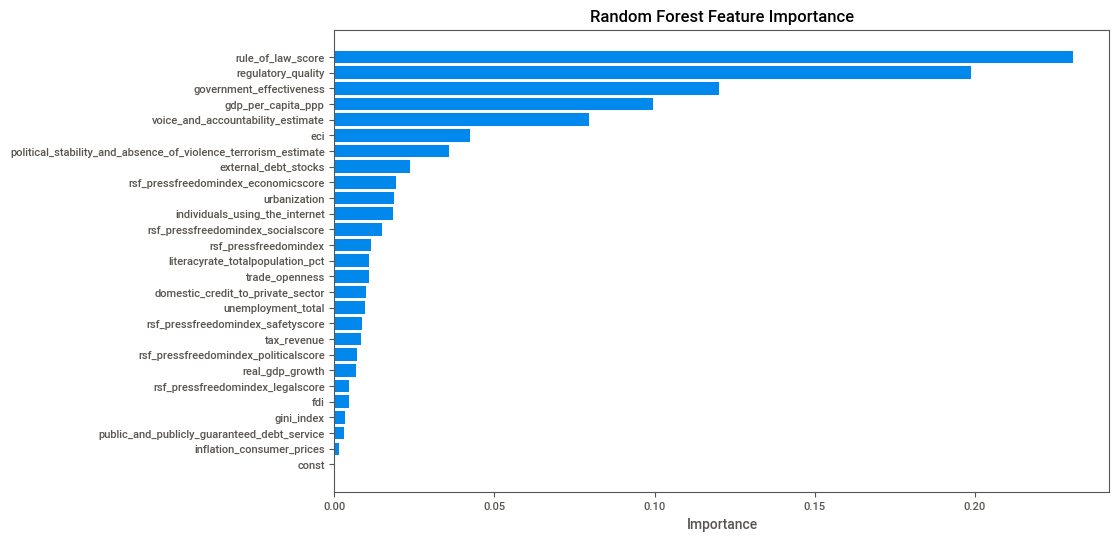

In [535]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model
_ = rf.fit(X_train_imputed, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_train_imputed.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()

According to the above plot, we will choose a few features with the highest importance scores, namely:
- ```"rule_of_law_score"```
- ```"government_effectiveness"```
- ```"regulatory_quality"```
- ```"gdp_per_capita_ppp"``` 

Then, we fit a fresh logistic regression model using only these selected features. After retraining the model, we will re-evaluate the model performance using the same metrics as before.

In [536]:
selected_features = ['rule_of_law_score', 'government_effectiveness', 'regulatory_quality', 'gdp_per_capita_ppp']

X_train_imputed_model2 = X_train_imputed[selected_features]
X_test_imputed_model2 = X_test_imputed[selected_features]

logit_model2 = LogisticRegression()
_ = logit_model2.fit(X_train_imputed_model2, y_train)

In [537]:
# generate predictions on the training and test set
train_probas_model2 = logit_model2.predict_proba(X_train_imputed_model2)[:, 1]
test_probas_model2 = logit_model2.predict_proba(X_test_imputed_model2)[:, 1]

# convert predicted scores to binary predictions for the training and test set
train_preds_model2 = np.where(train_probas_model2 >= 0.5, 1, 0)
test_preds_model2 = np.where(test_probas_model2 >= 0.5, 1, 0)

### 3.4 Model evaluation after feature selection

In [538]:
# confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, train_preds_model2)

# Extract TP, FP, FN, TN from confusion matrix
TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()

# Print the counts
print(f"True Negatives (TN): {TN_train}")
print(f"False Positives (FP): {FP_train}")
print(f"False Negatives (FN): {FN_train}")
print(f"True Positives (TP): {TP_train}")

# Convert confusion matrix to a DataFrame
conf_matrix_df_train = pd.DataFrame(
    conf_matrix_train, 
    columns=["Predicted 0", "Predicted 1"], 
    index=["Actual 0", "Actual 1"]
)

# Melt the confusion matrix DataFrame to long format
conf_matrix_long_train = conf_matrix_df_train.reset_index().melt(id_vars="index", value_vars=["Predicted 0", "Predicted 1"])
conf_matrix_long_train.columns = ["Actual", "Predicted", "Count"]

# Define a mapping of coordinates to labels
label_map = {
    ("Actual 0", "Predicted 0"): "TN",
    ("Actual 0", "Predicted 1"): "FP",
    ("Actual 1", "Predicted 0"): "FN",
    ("Actual 1", "Predicted 1"): "TP",
}

# Add annotations for TP, FP, FN, TN counts
conf_matrix_long_train['Annotation'] = conf_matrix_long_train.apply(
    lambda row: f"{label_map[(row['Actual'], row['Predicted'])]}: {row['Count']}", axis=1
)


# Create confusion matrix plot with Lets-Plot
conf_matrix_plot_train = ggplot(conf_matrix_long_train, aes(x='Predicted', y='Actual', fill='Count')) + \
    geom_tile() + \
    geom_text(aes(label='Annotation'), size=10, color='black', vjust=0.5, hjust=0.5) + \
    scale_fill_gradient(low='white', high='blue') + \
    ggtitle('Confusion Matrix') + \
    xlab('Predicted') + \
    ylab('Actual') + \
    coord_fixed(ratio=1) + \
    theme_minimal() + \
    theme(
        legend_position='right',
        plot_margin=0  # FIX: Remove element_blank() and use 0
    )

conf_matrix_plot_train

True Negatives (TN): 23
False Positives (FP): 2
False Negatives (FN): 1
True Positives (TP): 50


In [539]:
# confusion matrix for the testing set
conf_matrix = confusion_matrix(y_test, test_preds_model2)

# Extract TP, FP, FN, TN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Print the counts
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Convert confusion matrix to a DataFrame in long format for Lets-Plot
conf_matrix_df = pd.DataFrame(conf_matrix, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

# Melt the confusion matrix DataFrame to long format
conf_matrix_long = conf_matrix_df.reset_index().melt(id_vars="index", value_vars=["Predicted 0", "Predicted 1"])
conf_matrix_long.columns = ["Actual", "Predicted", "Count"]

# Define a mapping of coordinates to labels
label_map = {
    ("Actual 0", "Predicted 0"): "TN",
    ("Actual 0", "Predicted 1"): "FP",
    ("Actual 1", "Predicted 0"): "FN",
    ("Actual 1", "Predicted 1"): "TP",
}

# Add annotations for TP, FP, FN, TN counts
conf_matrix_long['Annotation'] = conf_matrix_long.apply(
    lambda row: f"{label_map[(row['Actual'], row['Predicted'])]}: {row['Count']}", axis=1
)

# Create confusion matrix plot with Lets-Plot
conf_matrix_plot = ggplot(conf_matrix_long, aes(x='Predicted', y='Actual', fill='Count')) + \
    geom_tile() + \
    geom_text(aes(label='Annotation'), size=10, color='black', vjust=0.5, hjust=0.5) + \
    scale_fill_gradient(low='white', high='blue') + \
    ggtitle('Confusion Matrix') + \
    xlab('Predicted') + \
    ylab('Actual') + \
    coord_fixed(ratio=1) + \
    theme_minimal() + \
    theme(
        legend_position='right',
        plot_margin=0  # FIX: Remove element_blank() and use 0
    )
    
conf_matrix_plot

True Negatives (TN): 8
False Positives (FP): 0
False Negatives (FN): 1
True Positives (TP): 17


In [540]:
# calculate balanced accuracy
balanced_accuracy_train_model2 = np.round(balanced_accuracy_score(y_train, train_preds_model2), 3)
balanced_accuracy_test_model2 = np.round(balanced_accuracy_score(y_test, test_preds_model2), 3)

# calculate f1 score
train_f1_model2 = np.round(f1_score(y_train, train_preds_model2), 3)
test_f1_model2 = np.round(f1_score(y_test, test_preds_model2), 3)

# calculate AUC-PR
train_auc_pr_model2 = np.round(average_precision_score(y_train, train_probas_model2), 3)
test_auc_pr_model2 = np.round(average_precision_score(y_test, test_probas_model2), 3)

# print the results
print(f"Balanced Accuracy (Train): {balanced_accuracy_train_model2}")
print(f"Balanced Accuracy (Test): {balanced_accuracy_test_model2}")

print(f"F1-Score (Train): {train_f1_model2}")
print(f"F1-Score (Test): {test_f1_model2}")

print(f"AUC-PR (Train): {train_auc_pr_model2}")
print(f"AUC-PR (Test): {test_auc_pr_model2}")

Balanced Accuracy (Train): 0.95
Balanced Accuracy (Test): 0.972
F1-Score (Train): 0.971
F1-Score (Test): 0.971
AUC-PR (Train): 0.998
AUC-PR (Test): 0.994


In [541]:
writer = MarkdownTableWriter()
writer.table_name = "Logistic regression model with selected features"
writer.headers = ["Metric", "Training set", "Test set"]
writer.value_matrix = [
    ["Balanced Accuracy", balanced_accuracy_train_model2, balanced_accuracy_test_model2],
    ["F1-Score", train_f1_model2, test_f1_model2],
    ["AUC-PR", train_auc_pr_model2, test_auc_pr_model2]
]
writer

Metric,Training set,Test set
Balanced Accuracy,0.950,0.972
F1-Score,0.971,0.971
AUC-PR,0.998,0.994


Let us interpret the performance metrics of the logistic regression model after feature selection (call this Model 2), and compare them to the baseline model (Model 1).  

1. Less overfitting 
    - Previously, the model was overfitting the training data as evidenced by the perfect training metrics and lower test metrics
    - After feature selection, the training scores have decreased slightly, but the training and test scores are now extremely similar. This suggests that the model is no longer overfitting the training data and is generalising better to unseen data
  
2. Better generalisation to test data in all metrics
    - Balanced accuracy for the test set improved from 0.882 to 0.972, meaning the model is now much better at classifying both corrupt and non-corrupt countries in unseen data
    - F1 score also increased from 0.914 to 0.971, indicating a better balance between precision and recall
    - AUC-PR increased from 0.985 to 0.994

3. Stronger predictive power with fewer features
    - The model now only uses 4 features instead of the original 26, yet it performs better on the test set
    - **Using fewer but more relevant features reduces noise from irrelevant/ weakly correlated variables**, leading to better model performance
    - The selected features align well with **institutional and economic factors** correlated with corruption
    - This also makes the model **more interpretable** as we are only using the most important features


##  Question 4  
### 4.1 Random Forest model  
We will use a Random Forest model as our tree-based model and **tune its hyperparameters** using GridSearchCV. We use **AUC-PR as the scoring metric** for GridSearchCV as it is more informative for imbalanced datasets. We will also evaluate the performance of the tuned Random Forest model using cross-validation.

In [542]:
# define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200], # number of trees
    'max_depth': [None, 5, 10, 15], # maximum depth of the tree
    'min_samples_split': [2, 5, 10], # minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2'] # number of features to consider at each split
}

rf = RandomForestClassifier(random_state=42)

# Perform cross-validation (5 folds) with average_precision as the scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='average_precision')
grid_search.fit(X_train_imputed, y_train)

# Get best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")


Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [543]:
best_rf = grid_search.best_estimator_

cv_scores = cross_val_score(best_rf, X_train_imputed, y_train, cv=5, scoring='average_precision')

print("AUC-PR Scores for each fold:", cv_scores)
print("Mean AUC-PR Score (Train):", round(cv_scores.mean(), 3))

AUC-PR Scores for each fold: [0.99242424 1.         1.         1.         1.        ]
Mean AUC-PR Score (Train): 0.998


**AUC-PR is extremely high in all folds (≈1.0)**, suggesting that the Random Forest model is very good at classifying corrupt and non-corrupt countries. There is also **minimal variability** in the AUC-PR across the folds, indicating that the model is **robust across different splits of the data**.  

We also **evaluate the model on the test set** using the same metrics as before in Section 3.2.

In [544]:
test_preds_model3 = best_rf.predict(X_test_imputed)
test_probas_model3 = best_rf.predict_proba(X_test_imputed)[:, 1]

# calculate evaluation metrics for the test set
balanced_accuracy_test_model3 = np.round(balanced_accuracy_score(y_test, test_preds_model3), 3)
test_f1_model3 = np.round(f1_score(y_test, test_preds_model3), 3)
test_auc_pr_model3 = np.round(average_precision_score(y_test, test_probas_model3), 3)

# print the results
print(f"Balanced Accuracy (Test): {balanced_accuracy_test_model3}")
print(f"F1-Score (Test): {test_f1_model3}")
print(f"AUC-PR (Test): {test_auc_pr_model3}")

Balanced Accuracy (Test): 0.91
F1-Score (Test): 0.944
AUC-PR (Test): 0.994


| Metric | Model 1 (Baseline Logistic Regression) | Model 2 (Logistic Regression with Feature Selection) | Model 3 (Random Forest) |
| --- | --- | --- | --- |
| Balanced accuracy (test set) | 0.882 | 0.972 | 0.910 |
| F1 score (test set) | 0.914 | 0.971 | 0.944 |
| AUC-PR (test set) | 0.985 | 0.994 | 0.994 |

Compared to the baseline logistic regression model (Model 1), the Random Forest model after hyperparameter tuning and cross-validation (Model 3) performs better in terms of all evaluation metrics for the test set, showing that it is better at generalising to unseen data.  

Let us compare the feature-selected logistic regression model (Model 2) to the Random Forest model (Model 3) as well. Model 2 performs better than the Model 3 in terms of balanced accuracy and F1 score and ties with Model 3 in terms of AUC-PR. This suggests that the feature-selected logistic regression model is the best-performing model among the three. It is also a **simple and interpretable** model, unlike the Random Forest model. 


### 4.2 k-Nearest Neighbors model  
We will use a k-Nearest Neighbors (kNN) model as our non-parametric model and tune its hyperparameters using GridSearchCV. 

In [545]:
# k-NN model with parameter tuning
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15], # number of neighbors
    'weights': ['uniform', 'distance'], # weight function used in prediction
    'metric': ['euclidean', 'manhattan'] # distance metric
}

knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='average_precision')

knn_cv.fit(X_train_imputed, y_train)

# best parameters
print("Best n_neighbors:", knn_cv.best_params_)
print("Best AUC-PR score (Train):", round(knn_cv.best_score_, 3))

Best n_neighbors: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best AUC-PR score (Train): 0.972


We also evaluate the kNN model on the test set using the same metrics as before.

In [546]:
best_knn = knn_cv.best_estimator_
test_preds_model4 = best_knn.predict(X_test_imputed)
test_probas_model4 = best_knn.predict_proba(X_test_imputed)[:, 1]

# calculate evaluation metrics for the test set
balanced_accuracy_test_model4 = np.round(balanced_accuracy_score(y_test, test_preds_model4), 3)
test_f1_model4 = np.round(f1_score(y_test, test_preds_model4), 3)
test_auc_pr_model4 = np.round(average_precision_score(y_test, test_probas_model4), 3)

# print the results
print(f"Balanced Accuracy (Test): {balanced_accuracy_test_model4}")
print(f"F1-Score (Test): {test_f1_model4}")
print(f"AUC-PR (Test): {test_auc_pr_model4}")


Balanced Accuracy (Test): 0.91
F1-Score (Test): 0.944
AUC-PR (Test): 0.928


| Metric | Model 1 (Baseline Logistic Regression) | Model 2 (Logistic Regression with Feature Selection) | Model 3 (Random Forest) | Model 4 (kNN) |
| --- | --- | --- | --- | --- |
| Balanced accuracy (test set) | 0.882 | 0.972 | 0.910 | 0.910 |
| F1 score (test set) | 0.914 | 0.971 | 0.944 | 0.944 |
| AUC-PR (test set) | 0.985 | 0.994 | 0.994 | 0.928 |

The kNN model (Model 4) performs better than Model 1 in terms of balanced accuracy and F1 score, but worse in terms of AUC-PR. It also performs worse than Model 2 in terms of all evaluation metrics. The kNN model also **overfits** the training data, as evidenced by the higher AUC-PR on the training set compared to the test set (0.972 vs 0.928). This suggests that the kNN model does not generalise as well to unseen data as compared to our best performing model thus far, the feature-selected logistic regression model (Model 2). Furthermore, the kNN model **lacks interpretability**.

## Conclusion
After evaluating 4 different models - baseline logistic regression (Model 1), feature-selected logistic regression (Model 2), hyperparameter-tuned Random Forest (Model 3), and hyperparameter-tuned kNN (Model 4), we can conclude that **Model 2 is the best performing model for predicting corruption in our dataset**. Model 2 performs the best in terms of all evaluation metrics (balanced accuracy, F1 score, and AUC-PR) on the test set. It also generalises well to unseen data, showing little signs of overfitting, unlike Models 1 and 4. Moreover, the model is simple and interpretable as it is a logistic regression model and uses only 4 features. Model 3 also performs well (tied with Model 2 in terms of AUC-PR) but is more complex and less interpretable than Model 2. Model 4 performs worse than Model 2 in terms of all evaluation metrics and shows signs of overfitting.  


## Generative AI acknowledgement  
This notebook was written on VSCode with the GitHub Copilot extension activated. It provided some useful suggestions when autocompleting code. I also used ChatGPT to provide some ideas on how to do feature selection and hyperparameter tuning for the Random Forest and kNN models.